In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
import math
from scipy.integrate import solve_ivp

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
#from model_equations_separate_NC import *
from model_equations_separate_NC_store_numba import *


In [4]:
morder = ['MIN', 'OVERFLOW', 'MIXOTROPH', 'EXOENZYME', 'ROS',]
media_order = ['lowN', 'pro99']
mpalette = 'twilight'
sns.color_palette(mpalette, n_colors=5)


[(0.4828677867260272, 0.6304330455306234, 0.761915371498953),
 (0.3668108554010799, 0.26404857724525643, 0.6464799165290824),
 (0.18488035509396164, 0.07942573027972388, 0.21307651648984993),
 (0.5566322903496934, 0.17269677158182117, 0.31423043195101424),
 (0.775907907306857, 0.5355421788246119, 0.42413367909988375)]

In [5]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Np', 'Bh','Nh',  'ABp', 'ABh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Cp', 'Bh[C]', 'Ch', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


[(0.6, 0.8, 0.6),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (1.0, 0.8235294117647058, 0.6627450980392157),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.4470588235294118, 0.5215686274509804, 0.7176470588235294),
 (0.0, 0.0, 0.0),
 (0.7333333333333333, 0.8549019607843137, 1.0),
 (0.6, 0.8, 0.6),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (1.0, 0.8235294117647058, 0.6627450980392157),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.8, 0.4, 0.4),
 (0.0, 0.0, 0.0),
 (1.0, 0.615686274509804, 0.6431372549019608)]

In [6]:
plt.rcParams['figure.dpi']= 300

In [7]:

 
sns.color_palette([PCOLOR, HCOLOR, PCOLOR_light, HCOLOR_light] )


[(0.6, 0.8, 0.6),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.8235294117647058, 0.6627450980392157)]

In [8]:
refdf = pd.read_excel('reference_10cc_axenic.xlsx')
refp99df = pd.read_excel('reference_pro99_axenic.xlsx')


In [9]:
dpath = '/fast_data/Osnat/RECYCLE_MODEL/results/shgo2/out'
dpath = 'results'

In [10]:
os.listdir(dpath)

['monte_ponly_clean_mse.csv.gz',
 'sensitivity_vmax2_df.csv.gz',
 'monte_ponly_clean_df.csv.gz',
 'monte_het_minmse.csv.gz',
 'sensitivity_df.csv.gz',
 'default_initial_lowN_ponly_MIN_h4139617574487472499_sum.csv.gz',
 'monte_ponly_df.csv.gz',
 'default_initial_lowN_ponly_MIN_h4139617574487472499_mse.csv.gz',
 'default_initial_lowN_ponly_MIN_h4139617574487472499_df.csv.gz',
 'baseline_df.csv.gz',
 'results_old_26122023',
 'monte_het_clean_sum.csv.gz',
 'baseline_sum.csv.gz',
 'monte_strong_ponly_clean_df.csv.gz',
 'sensitivity_vmax2_sum.csv.gz',
 'monte_strong_ponly_sum.csv.gz',
 'sensitivity_vmax_mse.csv.gz',
 'monte_ponly_mse.csv.gz',
 'monte_ponly_sum.csv.gz',
 'monte_het_clean_mse.csv.gz',
 'monte_strong_ponly_df.csv.gz',
 'sensitivity_sum.csv.gz',
 'sensitivity_vmax2_mse.csv.gz',
 'sensitivity_vmax_df.csv.gz',
 'monte_het_mse.csv.gz',
 'monte_strong_ponly_clean_sum.csv.gz',
 'monte_het_sum.csv.gz',
 'monte_strong_ponly_mse.csv.gz',
 'monte_ponly_clean_sum.csv.gz',
 'sensitivity_ms

In [11]:
pro99_mode = False 
which_organism = 'ponly'
organism_to_tune = 'PRO'
(var_names, init_var_vals, intermediate_names, calc_dydt, prepare_params_tuple
) = get_constants_per_organism(pro99_mode, which_organism)
for model in ['OVERFLOW', 'MIXOTROPH', 'ROS', 'MIN', 'EXOENZYME']:
    params_to_update, bounds, log_params = get_param_tuning_values(model, organism_to_tune)
    


In [12]:
df = pd.read_csv(os.path.join(dpath,'monte_strong_ponly_clean_df.csv.gz',))
mse_df = pd.read_csv(os.path.join(dpath,'monte_strong_ponly_clean_mse.csv.gz',))
sum_df = pd.read_csv(os.path.join(dpath,'monte_strong_ponly_clean_sum.csv.gz',))

In [13]:
sum_df.run_id.head().unique()

array(['monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1__monte__76_lowN_ponly_EXOENZYME_h1072566612385905584',
       'monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1__monte__57_lowN_ponly_EXOENZYME_h1072566612385905584',
       'monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1__monte__73_pro99_ponly_EXOENZYME_h1072566612385905584',
       'monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1__monte__49_pro99_ponly_EXOENZYME_h1072566612385905584',
       'monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1__monte__15_pro99_ponly_EXOENZYME_h1072566612385905584'],
      dtype=object)

In [14]:
sum_df[['id', 'media', 'which', 'model', 'hash']] = sum_df.run_id.str.rsplit('_', n=4, expand=True)
mse_df[['id', 'media', 'which', 'model', 'hash']] = mse_df.run_id.str.rsplit('_', n=4, expand=True)
df    [['id', 'media', 'which', 'model', 'hash']] =     df.run_id.str.rsplit('_', n=4, expand=True)

sum_df['idx'] = sum_df['id'] + '_' + sum_df['model']
mse_df['idx'] = mse_df['id'] + '_' + mse_df['model']
df    ['idx'] =     df['id'] + '_' +     df['model']

In [15]:
mse_df['RMSE'] = np.sqrt(mse_df['RMSE'])

In [16]:
mse_df.groupby('media').compare_points.describe()

count  mean  std   min   25%   50%   75%   max
media                                                 
lowN   8976.0  74.0  0.0  74.0  74.0  74.0  74.0  74.0
pro99  8976.0  58.0  0.0  58.0  58.0  58.0  58.0  58.0

In [17]:
mse_df['ref_compare_points'] = mse_df.media.map({'lowN' : 74, 'pro99': 58})
bad_ids_missing_points = set(mse_df.loc[mse_df.ref_compare_points != mse_df.compare_points, 'idx' ])
len(bad_ids_missing_points)

0

In [18]:
min_values = df[var_names+ ['idx']].groupby('idx').min().min(axis=1)
bad_ids_negative_values = set(min_values[min_values< -1e-9].index)
len(bad_ids_negative_values)

0

In [19]:
min_values

idx
monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1__monte__0_EXOENZYME     0.000000e+00
monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1__monte__10_EXOENZYME    0.000000e+00
monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1__monte__11_EXOENZYME    0.000000e+00
monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1__monte__12_EXOENZYME    0.000000e+00
monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1__monte__13_EXOENZYME    0.000000e+00
                                                                           ...     
monte2_ponly_ROS_vpro_97_23_ROS_C1__monte__95_ROS                      0.000000e+00
monte2_ponly_ROS_vpro_97_23_ROS_C1__monte__96_ROS                      0.000000e+00
monte2_ponly_ROS_vpro_97_23_ROS_C1__monte__98_ROS                      0.000000e+00
monte2_ponly_ROS_vpro_97_23_ROS_C1__monte__99_ROS                      0.000000e+00
monte2_ponly_ROS_vpro_97_23_ROS_C1__monte__9_ROS                      -9.836541e-23
Length: 2992, dtype: float64

In [20]:
bad_ids = bad_ids_missing_points | bad_ids_negative_values
len(bad_ids)

0

In [21]:
mse_df = mse_df.loc[~mse_df.idx.isin(bad_ids)].copy()
sum_df = sum_df.loc[~sum_df.idx.isin(bad_ids)].copy()
df     =     df.loc[    ~df.idx.isin(bad_ids)].copy()


In [22]:
sum_df.idx.nunique()

2992

In [23]:
# represent FL 0.1
NBIOMASS_LOD_NOT_GROWING = 2.34502821

In [24]:
maxday_df = df.loc[df['Bptotal[N]'].ge(NBIOMASS_LOD_NOT_GROWING)].groupby(['model', 'idx', 'media']).day.max().reset_index()
maxday_df.rename(columns=dict(day='last_day'), inplace=True)
maxbp_df = df.loc[df.groupby(['model', 'idx', 'media'])['Bptotal[N]'].idxmax()].reset_index(drop=True)
maxbp_df = maxbp_df[['day', 'Bptotal[N]', 'model', 'idx', 'media']]
maxbp_df.rename(columns={'day' : 'max_day', 'Bptotal[N]' : 'max_biomass',}, inplace=True)
maxday_df = pd.merge(maxbp_df, maxday_df, on=['model', 'idx', 'media'], how='left')

In [25]:
refmaxday_df = refdf.loc[refdf['ref_Bp[N]'].ge(NBIOMASS_LOD_NOT_GROWING)].groupby(['Sample', ]).day.max().reset_index()
refmaxday_df.rename(columns=dict(day='last_day'), inplace=True)
refmaxbp_df = refdf.loc[refdf.groupby(['Sample', ])['ref_Bp[N]'].idxmax()].reset_index(drop=True)
refmaxbp_df = refmaxbp_df[['day', 'ref_Bp[N]', 'Sample', ]]
refmaxbp_df.rename(columns={'day' : 'max_day', 'ref_Bp[N]' : 'max_biomass',}, inplace=True)
refmaxday_df = pd.merge(refmaxbp_df, refmaxday_df, on=['Sample', ], how='left')

In [26]:
ref99maxday_df = refp99df.loc[refp99df['ref_Bp[N]'].ge(NBIOMASS_LOD_NOT_GROWING)].groupby(['Sample', ]).day.max().reset_index()
ref99maxday_df.rename(columns=dict(day='last_day'), inplace=True)
ref99maxbp_df = refp99df.loc[refp99df.groupby(['Sample', ])['ref_Bp[N]'].idxmax()].reset_index(drop=True)
ref99maxbp_df = ref99maxbp_df[['day', 'ref_Bp[N]', 'Sample', ]]
ref99maxbp_df.rename(columns={'day' : 'max_day', 'ref_Bp[N]' : 'max_biomass',}, inplace=True)
ref99maxday_df = pd.merge(ref99maxbp_df, ref99maxday_df, on=['Sample', ], how='left')

In [27]:
ref99maxday_df['media'] = 'pro99'
refmaxday_df['media'] = 'lowN'

In [28]:
refmaxday_df = pd.concat([ref99maxday_df, refmaxday_df], ignore_index=True)

In [29]:
# for simulations that don't reach 1 umol N
maxday_df.last_day.fillna(value=0, inplace=True)

In [30]:
maxday_df.isna().sum()

max_day        0
max_biomass    0
model          0
idx            0
media          0
last_day       0
dtype: int64

In [31]:
maxday_df

max_day  max_biomass      model  \
0      8.943750    98.638972  EXOENZYME   
1     15.016667   766.813877  EXOENZYME   
2      1.081944     1.023315  EXOENZYME   
3      1.934028     1.017503  EXOENZYME   
4      1.081944     1.022956  EXOENZYME   
...         ...          ...        ...   
5979   0.000000     0.892857        ROS   
5980  97.997917    24.725478        ROS   
5981  93.918056    21.035808        ROS   
5982   0.000000     0.892857        ROS   
5983   0.000000     0.892857        ROS   

                                                    idx  media    last_day  
0     monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1...   lowN  128.767361  
1     monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1...  pro99   93.918056  
2     monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1...   lowN    0.000000  
3     monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1...  pro99    0.000000  
4     monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1...   lowN    0.000000  
...                                                 ...    ...         ...  
5979  monte2_ponly_ROS_vpro_97_23_ROS_C1__monte__98_ROS  pro99    0.000000  
5980  monte2_ponly_ROS_vpro_97_23_ROS_C1__monte__99_ROS   lowN  118.788889  
5981  monte2_ponly_ROS_vpro_97_23_ROS_C1__monte__99_ROS  pro99   93.918056  
5982   monte2_ponly_ROS_vpro_97_23_ROS_C1__monte__9_ROS   lowN    0.000000  
5983   monte2_ponly_ROS_vpro_97_23_ROS_C1__monte__9_ROS  pro99    0.000000  

[5984 rows x 6 columns]

In [32]:
mse_df.groupby('media')[['RMSE']].describe().T

media              lowN        pro99
RMSE count  8976.000000  8976.000000
     mean     54.355627   318.195606
     std      35.876259   297.849954
     min       8.840033    69.464901
     25%      33.189914   136.763970
     50%      34.032501   140.431199
     75%      58.369472   396.425089
     max     254.914002  1842.907284

In [33]:
#mse_df['RMSE'] = mse_df['RMSE'].clip(upper=1e5)

In [34]:
sum_df['model'].value_counts()

EXOENZYME    1600
MIXOTROPH    1398
OVERFLOW     1000
ROS           996
MIN           990
Name: model, dtype: int64

In [35]:
#mean_scores_1 = mse_df.groupby(['model', 'idx', 'media'], as_index=False)[['RMSE_clip', 'lRMSE_clip']].mean()
mean_scores = mse_df.pivot_table(index=['model', 'idx'], columns='media', values='RMSE' )
mean_scores
#mean_scores.columns = ['_'.join(col).strip() for col in mean_scores.columns.values]
mean_scores.rename(columns={'lowN': 'RMSE_lowN', 'pro99': 'RMSE_pro99'}, inplace=True)

mean_scores = mean_scores.reset_index()
mean_scores

media      model                                                idx  \
0      EXOENZYME  monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1...   
1      EXOENZYME  monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1...   
2      EXOENZYME  monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1...   
3      EXOENZYME  monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1...   
4      EXOENZYME  monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1...   
...          ...                                                ...   
2987         ROS  monte2_ponly_ROS_vpro_97_23_ROS_C1__monte__95_ROS   
2988         ROS  monte2_ponly_ROS_vpro_97_23_ROS_C1__monte__96_ROS   
2989         ROS  monte2_ponly_ROS_vpro_97_23_ROS_C1__monte__98_ROS   
2990         ROS  monte2_ponly_ROS_vpro_97_23_ROS_C1__monte__99_ROS   
2991         ROS   monte2_ponly_ROS_vpro_97_23_ROS_C1__monte__9_ROS   

media   RMSE_lowN   RMSE_pro99  
0      176.492338  1438.471840  
1       33.222216   136.544303  
2       33.222508   136.544756  
3       33.222841   136.545654  
4       34.246805   136.112194  
...           ...          ...  
2987    41.710879   151.235823  
2988    50.397780   345.466938  
2989    33.222876   136.546008  
2990    36.754155   136.830225  
2991    33.222876   136.546008  

[2992 rows x 4 columns]

In [36]:
mean_scores['RMSE'] = np.sqrt(mean_scores['RMSE_lowN']*  mean_scores['RMSE_pro99'])


In [37]:
mean_scores.groupby('model').describe().T

model               EXOENZYME          MIN    MIXOTROPH     OVERFLOW  \
media                                                                  
RMSE_lowN  count   800.000000   495.000000   699.000000   500.000000   
           mean     51.671331    53.596380    67.937107    49.840829   
           std      31.789201    32.499590    48.264096    29.713554   
           min      15.786964    27.712583    10.526510    13.113573   
           25%      33.222706    33.222682    33.222544    33.222535   
           50%      33.222876    34.075313    48.257238    33.222876   
           75%      54.096780    56.855186    82.533335    52.732791   
           max     178.398866   166.575865   254.359938   177.546058   
RMSE_pro99 count   800.000000   495.000000   699.000000   500.000000   
           mean    309.108934   313.719353   418.307724   282.684144   
           std     278.627654   279.359518   378.997969   257.456598   
           min     109.346680   132.886621   132.335441    70.049618   
           25%     136.544897   136.544637   136.543629   136.544382   
           50%     136.546008   136.546008   236.934935   136.546008   
           75%     386.467279   394.468809   583.191412   363.510089   
           max    1438.471840  1384.739116  1840.583819  1380.899276   
RMSE       count   800.000000   495.000000   699.000000   500.000000   
           mean    124.819287   127.931021   166.526237   116.884689   
           std      94.386949    95.029249   134.462767    87.007864   
           min      50.736691    64.372305    39.592585    34.863521   
           25%      67.352775    67.352804    67.352535    67.352560   
           50%      67.353181    68.763086   107.285614    67.353181   
           75%     141.403020   145.441470   220.067780   135.638568   
           max     503.864325   480.275042   684.230069   495.149698   

model                     ROS  
media                          
RMSE_lowN  count   498.000000  
           mean     44.892188  
           std      23.040163  
           min       9.020635  
           25%      33.222876  
           50%      33.222876  
           75%      43.797349  
           max     164.855911  
RMSE_pro99 count   498.000000  
           mean    232.377221  
           std     201.029435  
           min     113.363652  
           25%     136.546008  
           50%     136.546008  
           75%     226.366601  
           max    1333.846483  
RMSE       count   498.000000  
           mean    100.848664  
           std      67.888961  
           min      31.978308  
           25%      67.353181  
           50%      67.353181  
           75%     100.534711  
           max     465.900189

In [38]:
sns.set_context('poster')

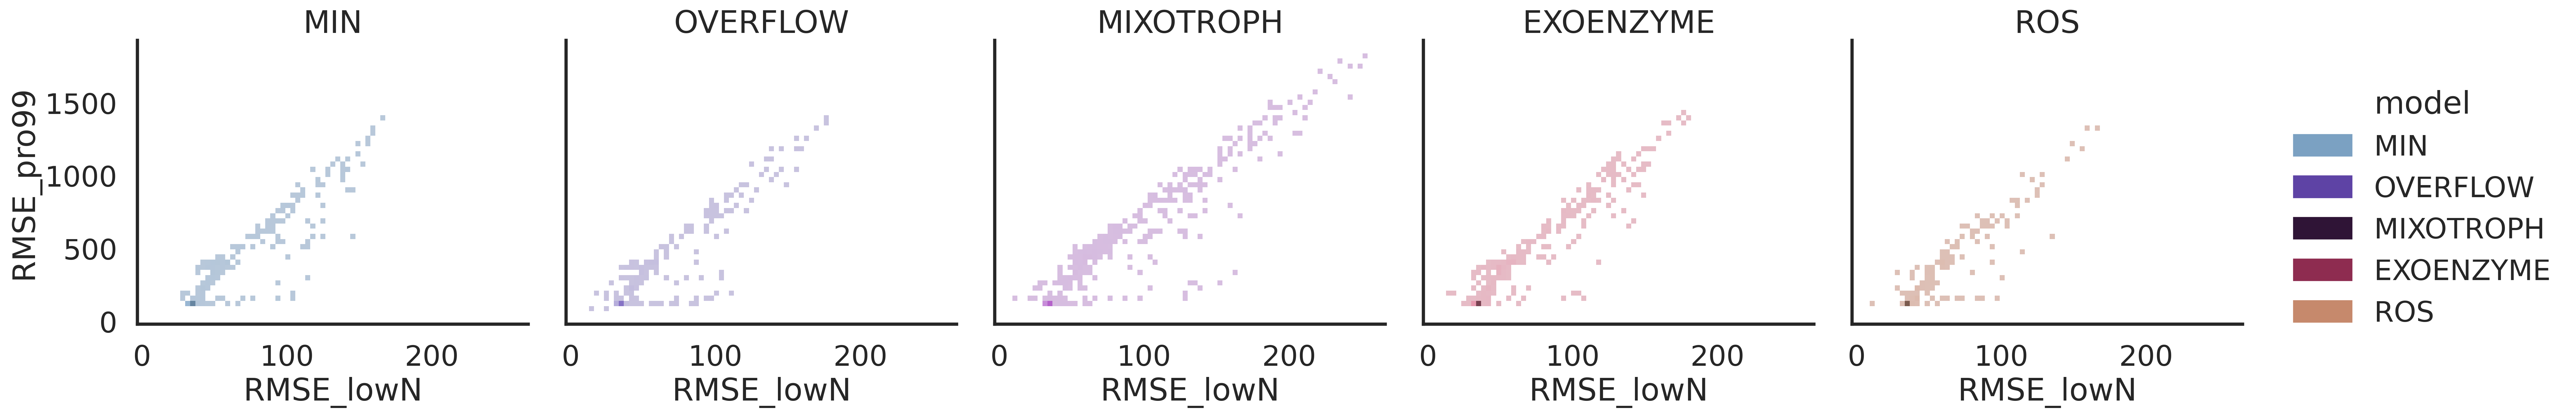

In [39]:
sns.displot(
    data=mean_scores,
    x='RMSE_lowN',  y='RMSE_pro99',
    hue='model', palette=mpalette, hue_order=morder,
    col='model', col_order=morder,
).set_titles(col_template='{col_name}', row_template='{row_name}')

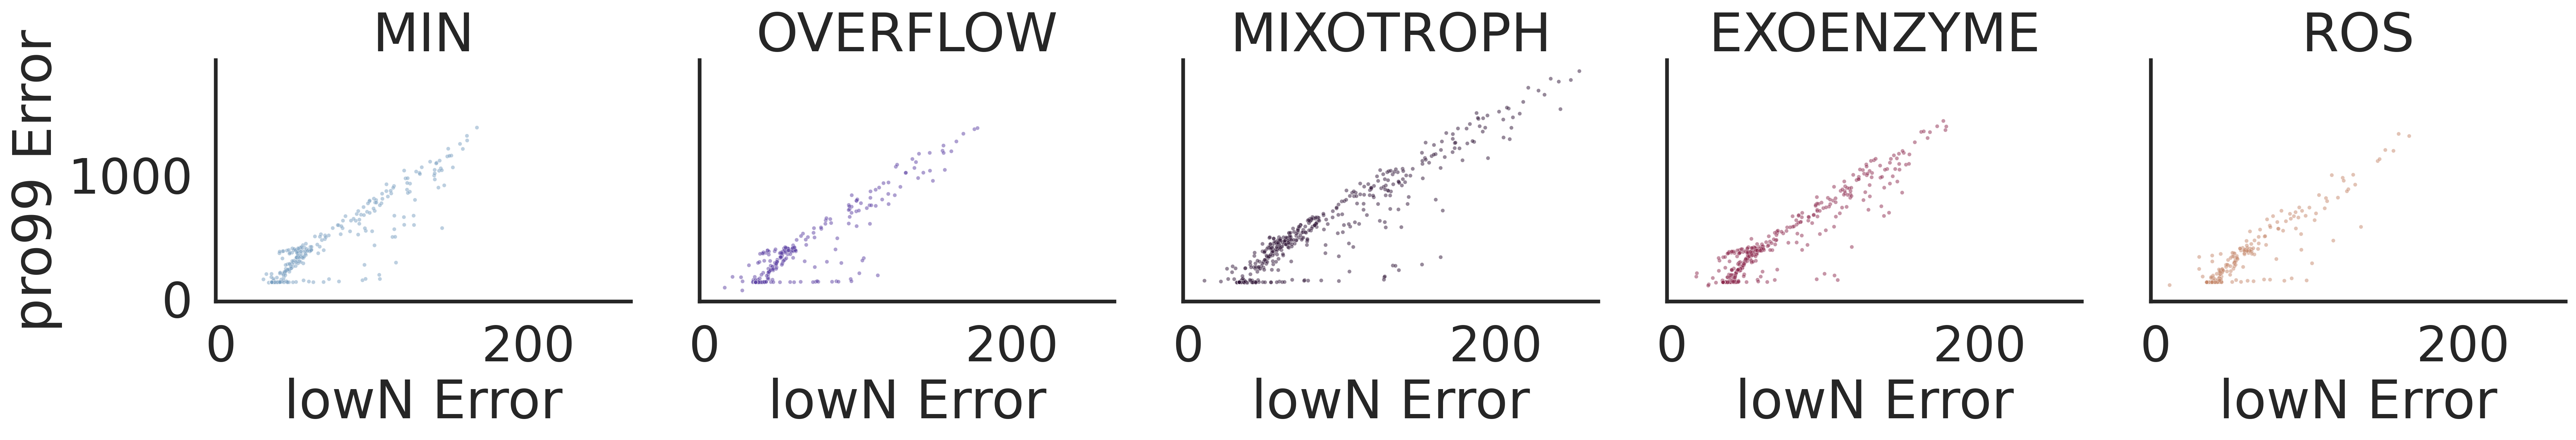

In [40]:
sns.set_context('poster',  font_scale=1.5)
g = sns.relplot(
    data=mean_scores,
    x='RMSE_lowN',  y='RMSE_pro99',
    hue='model', palette=mpalette, hue_order=morder,
    col='model', col_order=morder, #col_wrap=3,
    legend=False, s=7, alpha=0.5,
).set_titles(col_template='{col_name}', row_template='{row_name}')
g.set(xlabel='lowN Error', ylabel='pro99 Error', )
plt.savefig('figures/ponly_sobol_error.svg')

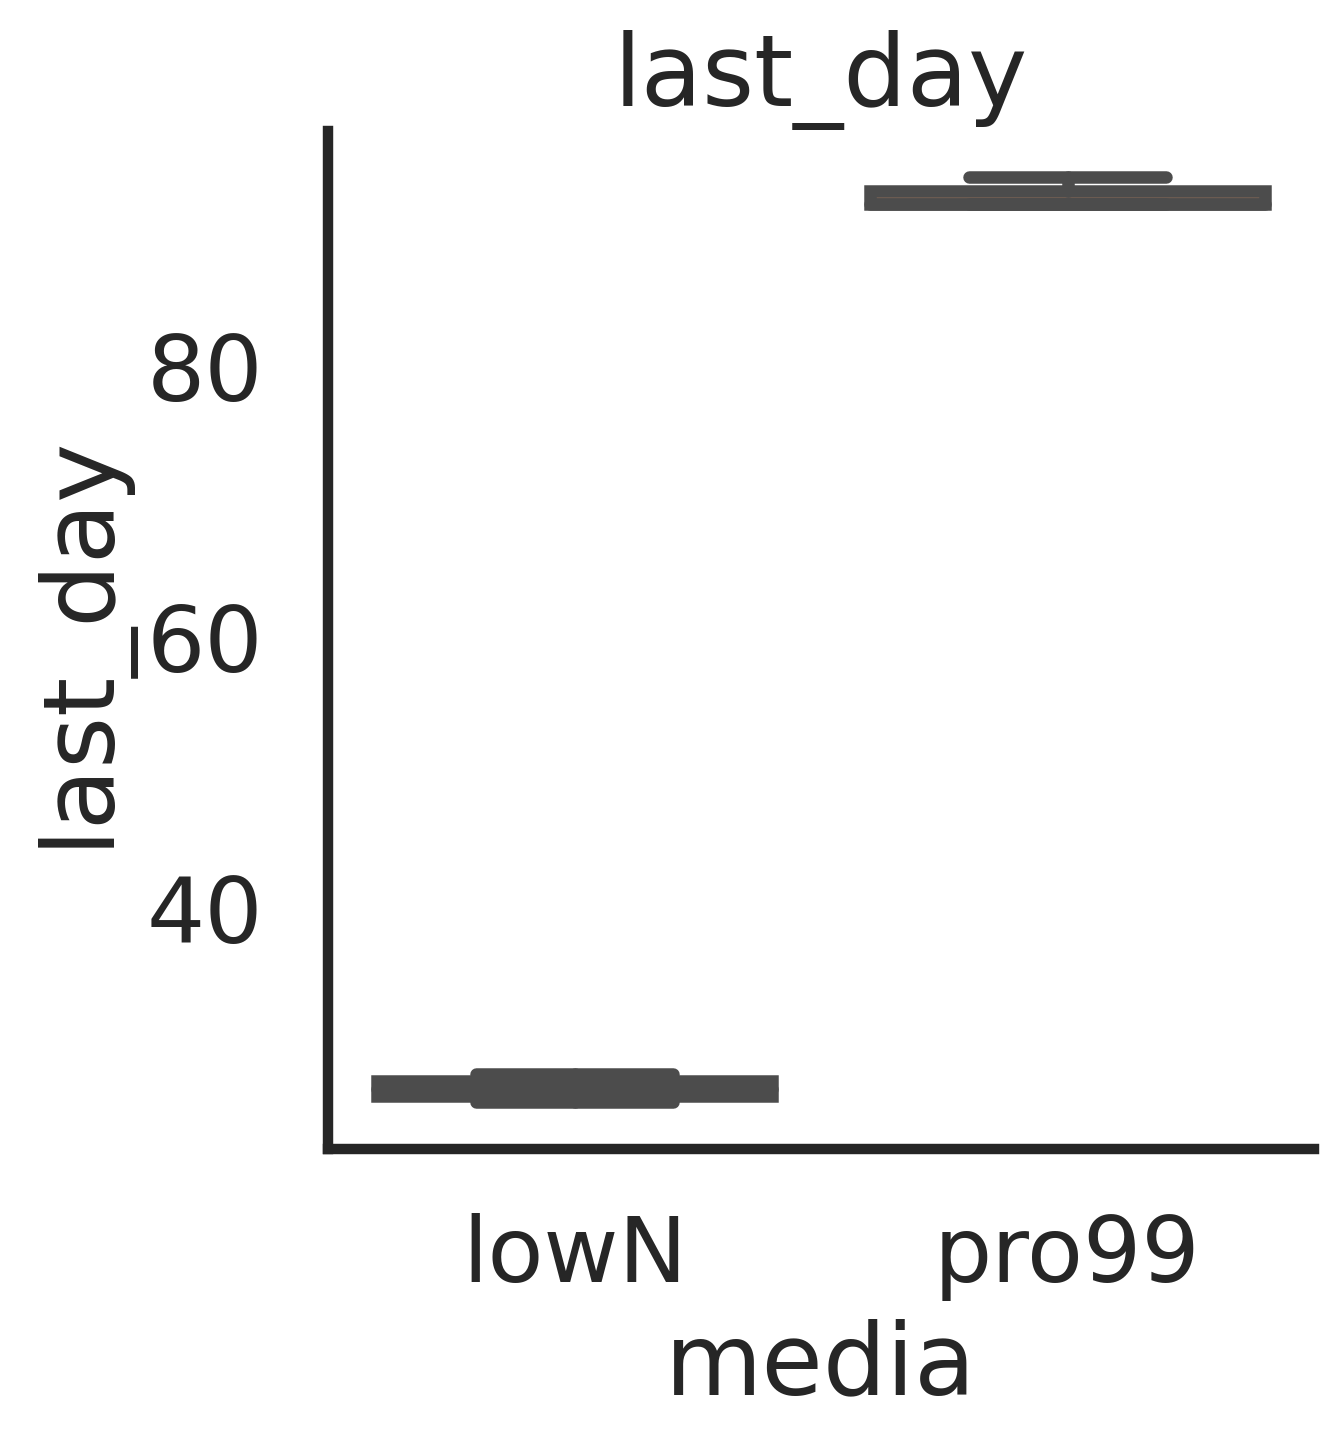

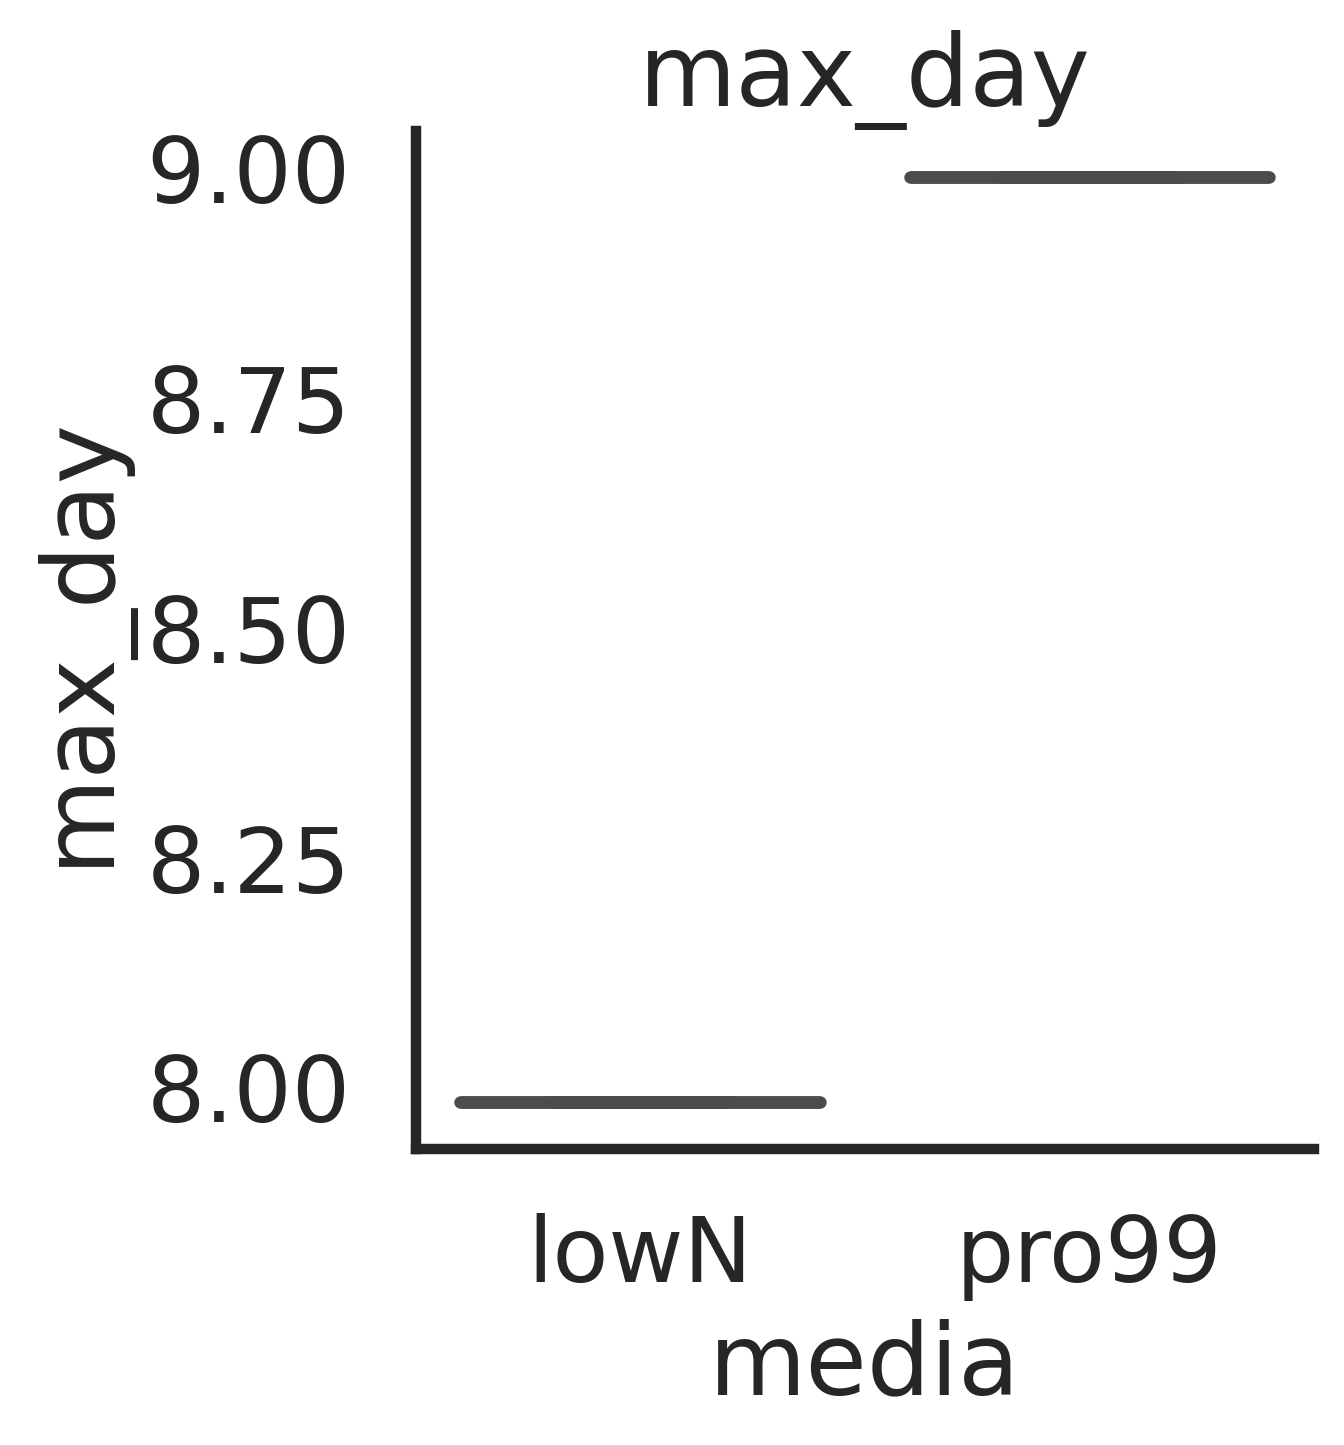

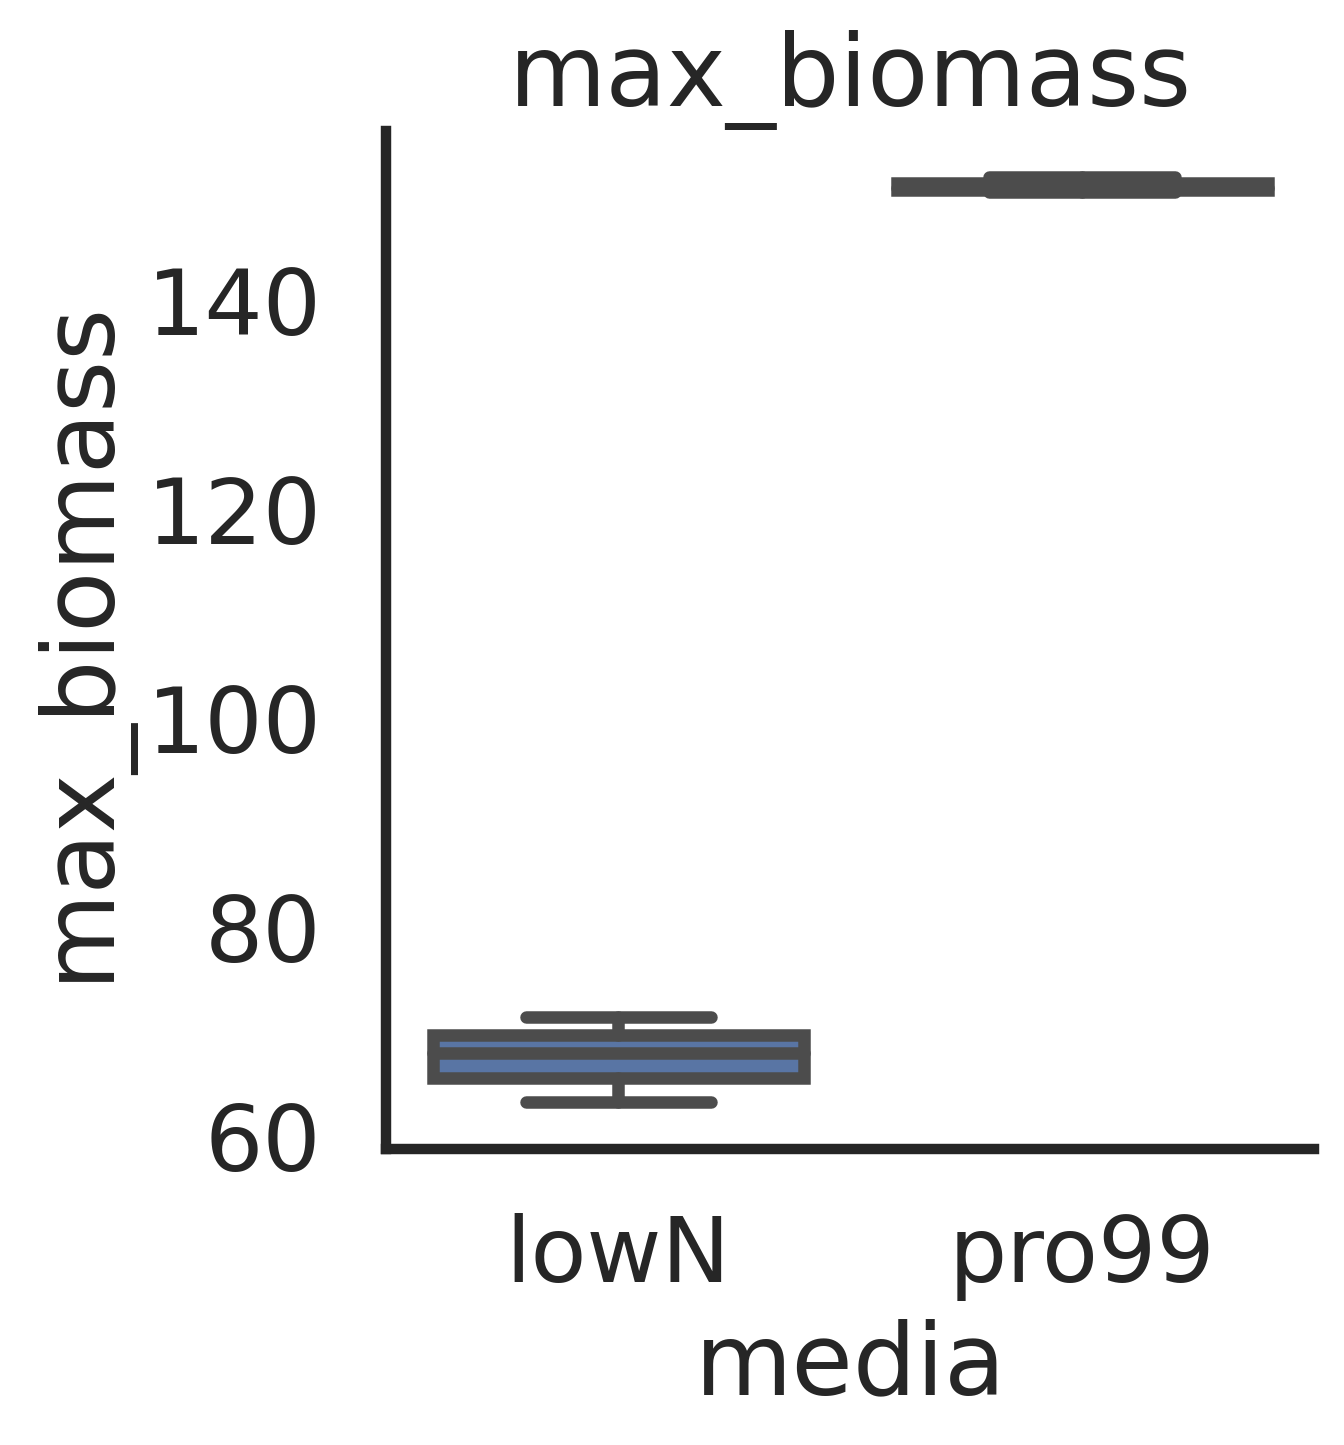

In [41]:
sns.set_context('poster')
for col in [ 'last_day', 'max_day', 'max_biomass']:

    sns.catplot(
        data=refmaxday_df,
        x='media', y=col,
        kind='box', #aspect=1.5,
        hue='media', hue_order=media_order, #palette=medpalette, 
        order=media_order, dodge=False,
    )
    plt.title(col)
        


In [42]:
refmaxday_df

max_day  max_biomass         Sample   last_day  media
0  8.990972   150.761864  Pro99_axenicA  91.922222  pro99
1  8.990972   150.363209  Pro99_axenicB  93.918056  pro99
2  8.990972   151.770226  Pro99_axenicC  91.922222  pro99
3  7.984028    63.292311            1A0  27.852778   lowN
4  7.984028    68.005818            1B0  25.734722   lowN
5  7.984028    71.453010            1C0  26.747222   lowN

In [43]:
refmaxday_df.groupby('media').agg(['count','mean', 'std'])

/tmp/ipykernel_19725/3761657928.py:1: FutureWarning: ['Sample'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  refmaxday_df.groupby('media').agg(['count','mean', 'std'])


max_day                max_biomass                       last_day  \
        count      mean  std       count        mean       std    count   
media                                                                     
lowN        3  7.984028  0.0           3   67.583713  4.096691        3   
pro99       3  8.990972  0.0           3  150.965100  0.725192        3   

                            
            mean       std  
media                       
lowN   26.778241  1.059368  
pro99  92.587500  1.152295

In [44]:
mean_scores

media      model                                                idx  \
0      EXOENZYME  monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1...   
1      EXOENZYME  monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1...   
2      EXOENZYME  monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1...   
3      EXOENZYME  monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1...   
4      EXOENZYME  monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1...   
...          ...                                                ...   
2987         ROS  monte2_ponly_ROS_vpro_97_23_ROS_C1__monte__95_ROS   
2988         ROS  monte2_ponly_ROS_vpro_97_23_ROS_C1__monte__96_ROS   
2989         ROS  monte2_ponly_ROS_vpro_97_23_ROS_C1__monte__98_ROS   
2990         ROS  monte2_ponly_ROS_vpro_97_23_ROS_C1__monte__99_ROS   
2991         ROS   monte2_ponly_ROS_vpro_97_23_ROS_C1__monte__9_ROS   

media   RMSE_lowN   RMSE_pro99        RMSE  
0      176.492338  1438.471840  503.864325  
1       33.222216   136.544303   67.352093  
2       33.222508   136.544756   67.352500  
3       33.222841   136.545654   67.353059  
4       34.246805   136.112194   68.274503  
...           ...          ...         ...  
2987    41.710879   151.235823   79.424046  
2988    50.397780   345.466938  131.949864  
2989    33.222876   136.546008   67.353181  
2990    36.754155   136.830225   70.916001  
2991    33.222876   136.546008   67.353181  

[2992 rows x 5 columns]

In [45]:
maxday_df = pd.merge(maxday_df, mean_scores, on=['model', 'idx'], how='left')

In [46]:
maxday_df

max_day  max_biomass      model  \
0      8.943750    98.638972  EXOENZYME   
1     15.016667   766.813877  EXOENZYME   
2      1.081944     1.023315  EXOENZYME   
3      1.934028     1.017503  EXOENZYME   
4      1.081944     1.022956  EXOENZYME   
...         ...          ...        ...   
5979   0.000000     0.892857        ROS   
5980  97.997917    24.725478        ROS   
5981  93.918056    21.035808        ROS   
5982   0.000000     0.892857        ROS   
5983   0.000000     0.892857        ROS   

                                                    idx  media    last_day  \
0     monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1...   lowN  128.767361   
1     monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1...  pro99   93.918056   
2     monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1...   lowN    0.000000   
3     monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1...  pro99    0.000000   
4     monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1...   lowN    0.000000   
...                                                 ...    ...         ...   
5979  monte2_ponly_ROS_vpro_97_23_ROS_C1__monte__98_ROS  pro99    0.000000   
5980  monte2_ponly_ROS_vpro_97_23_ROS_C1__monte__99_ROS   lowN  118.788889   
5981  monte2_ponly_ROS_vpro_97_23_ROS_C1__monte__99_ROS  pro99   93.918056   
5982   monte2_ponly_ROS_vpro_97_23_ROS_C1__monte__9_ROS   lowN    0.000000   
5983   monte2_ponly_ROS_vpro_97_23_ROS_C1__monte__9_ROS  pro99    0.000000   

       RMSE_lowN   RMSE_pro99        RMSE  
0     176.492338  1438.471840  503.864325  
1     176.492338  1438.471840  503.864325  
2      33.222216   136.544303   67.352093  
3      33.222216   136.544303   67.352093  
4      33.222508   136.544756   67.352500  
...          ...          ...         ...  
5979   33.222876   136.546008   67.353181  
5980   36.754155   136.830225   70.916001  
5981   36.754155   136.830225   70.916001  
5982   33.222876   136.546008   67.353181  
5983   33.222876   136.546008   67.353181  

[5984 rows x 9 columns]

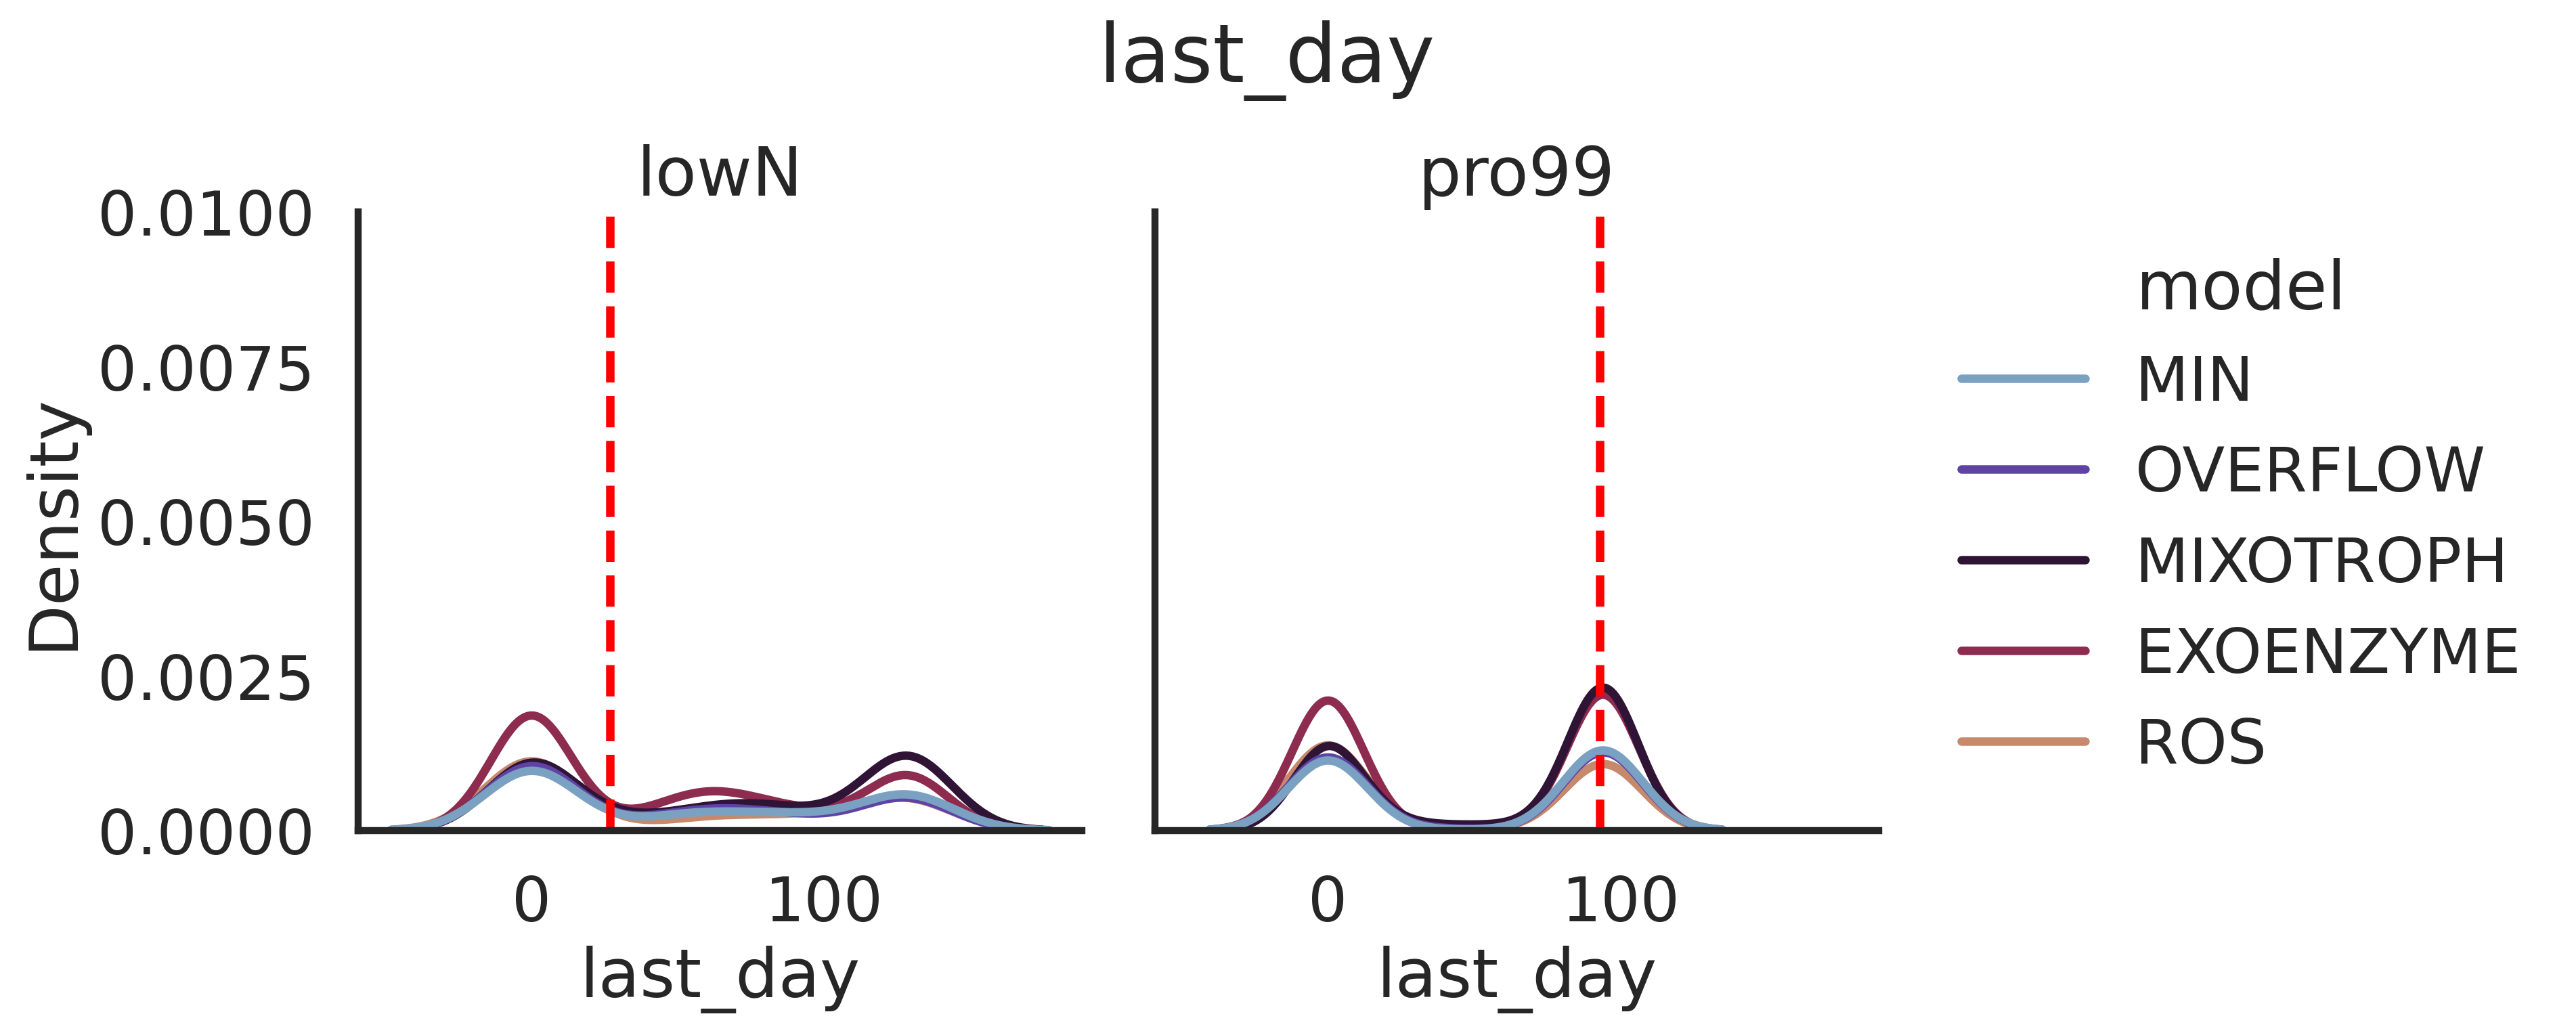

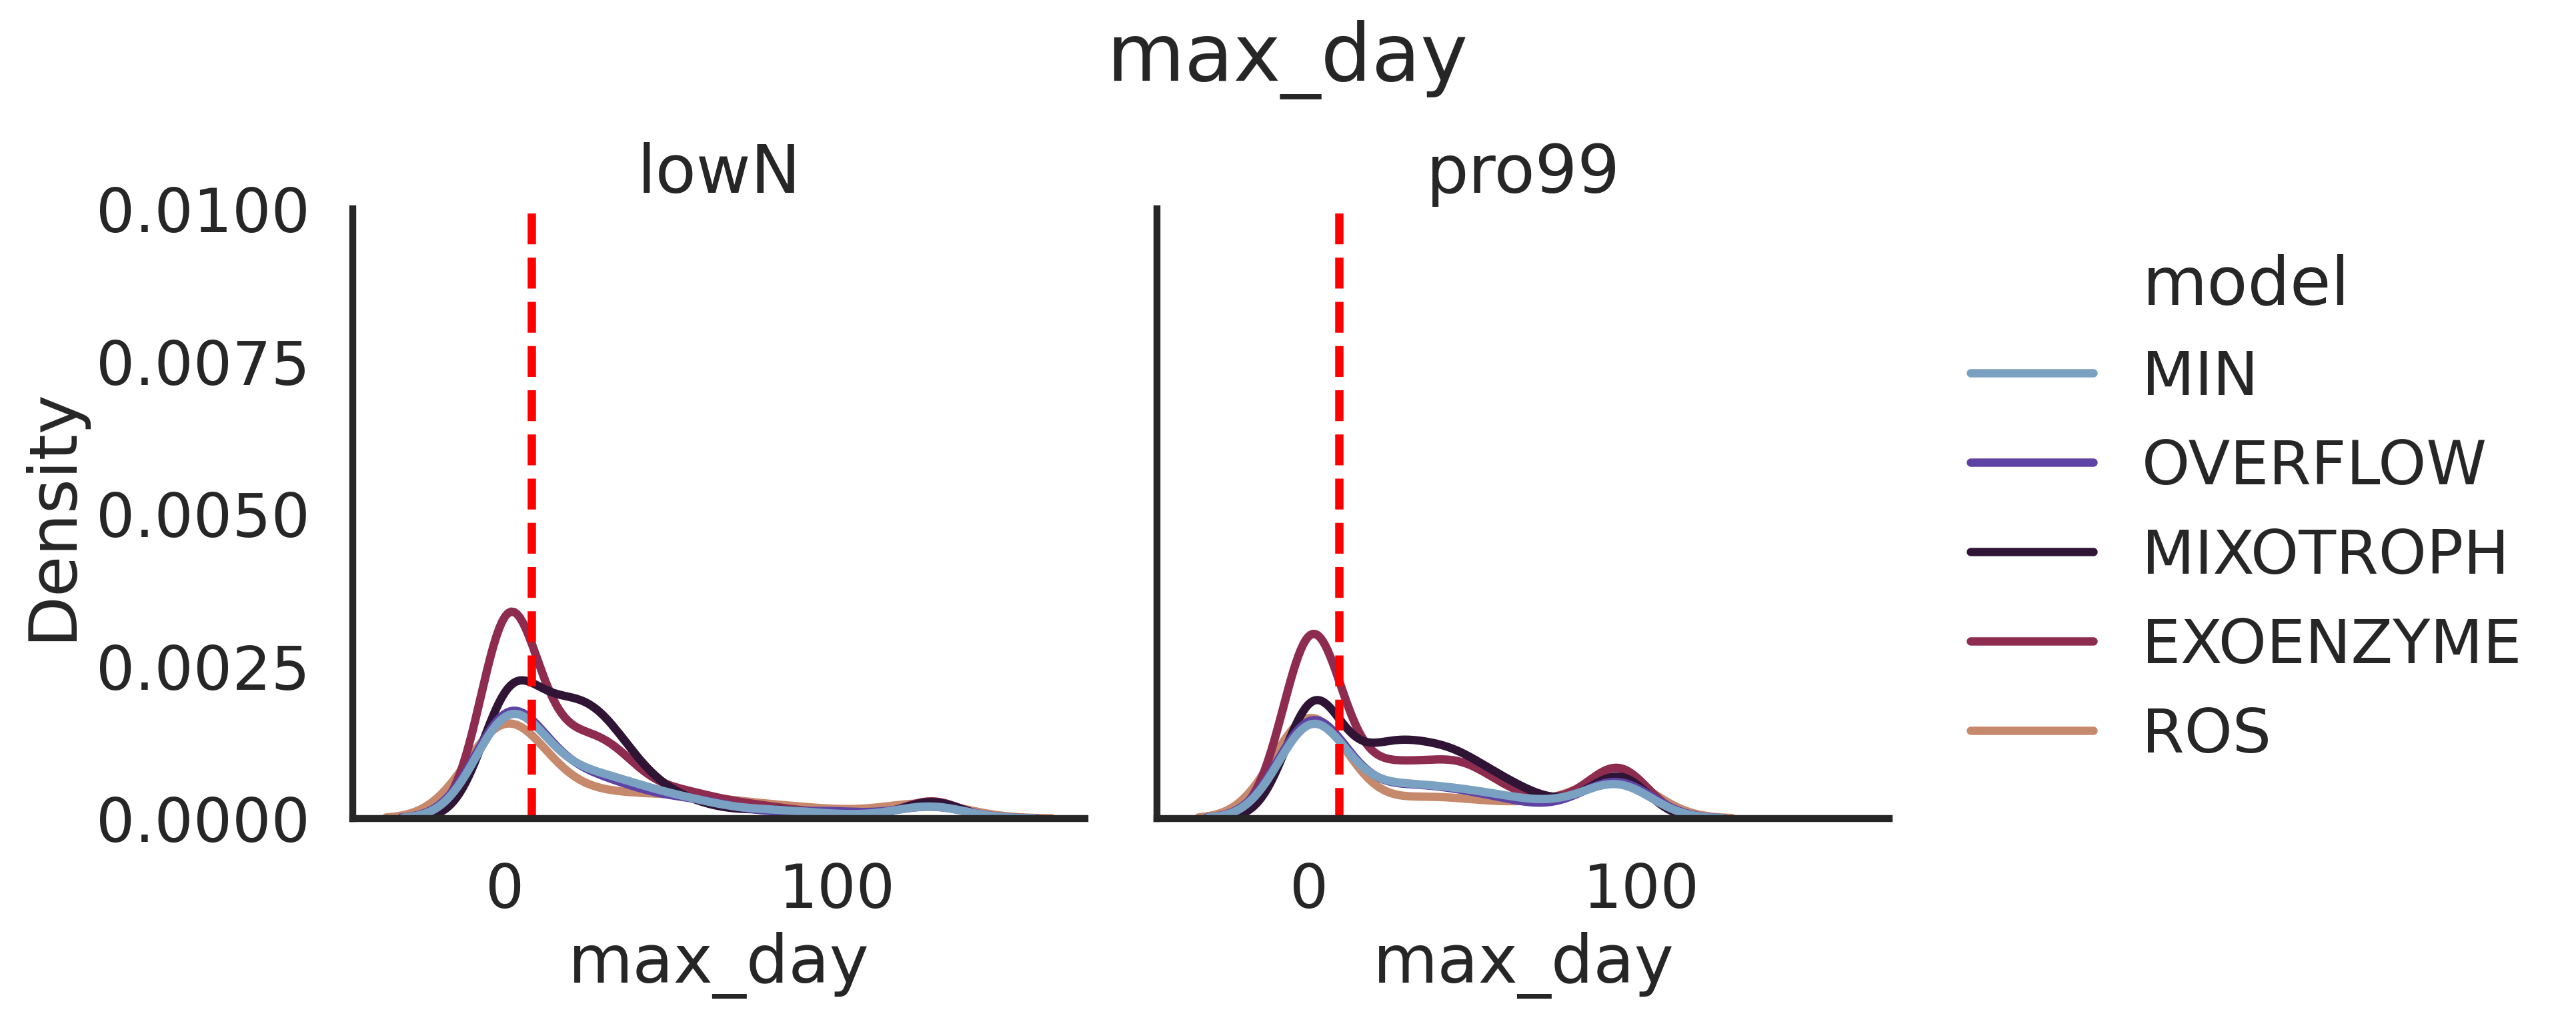

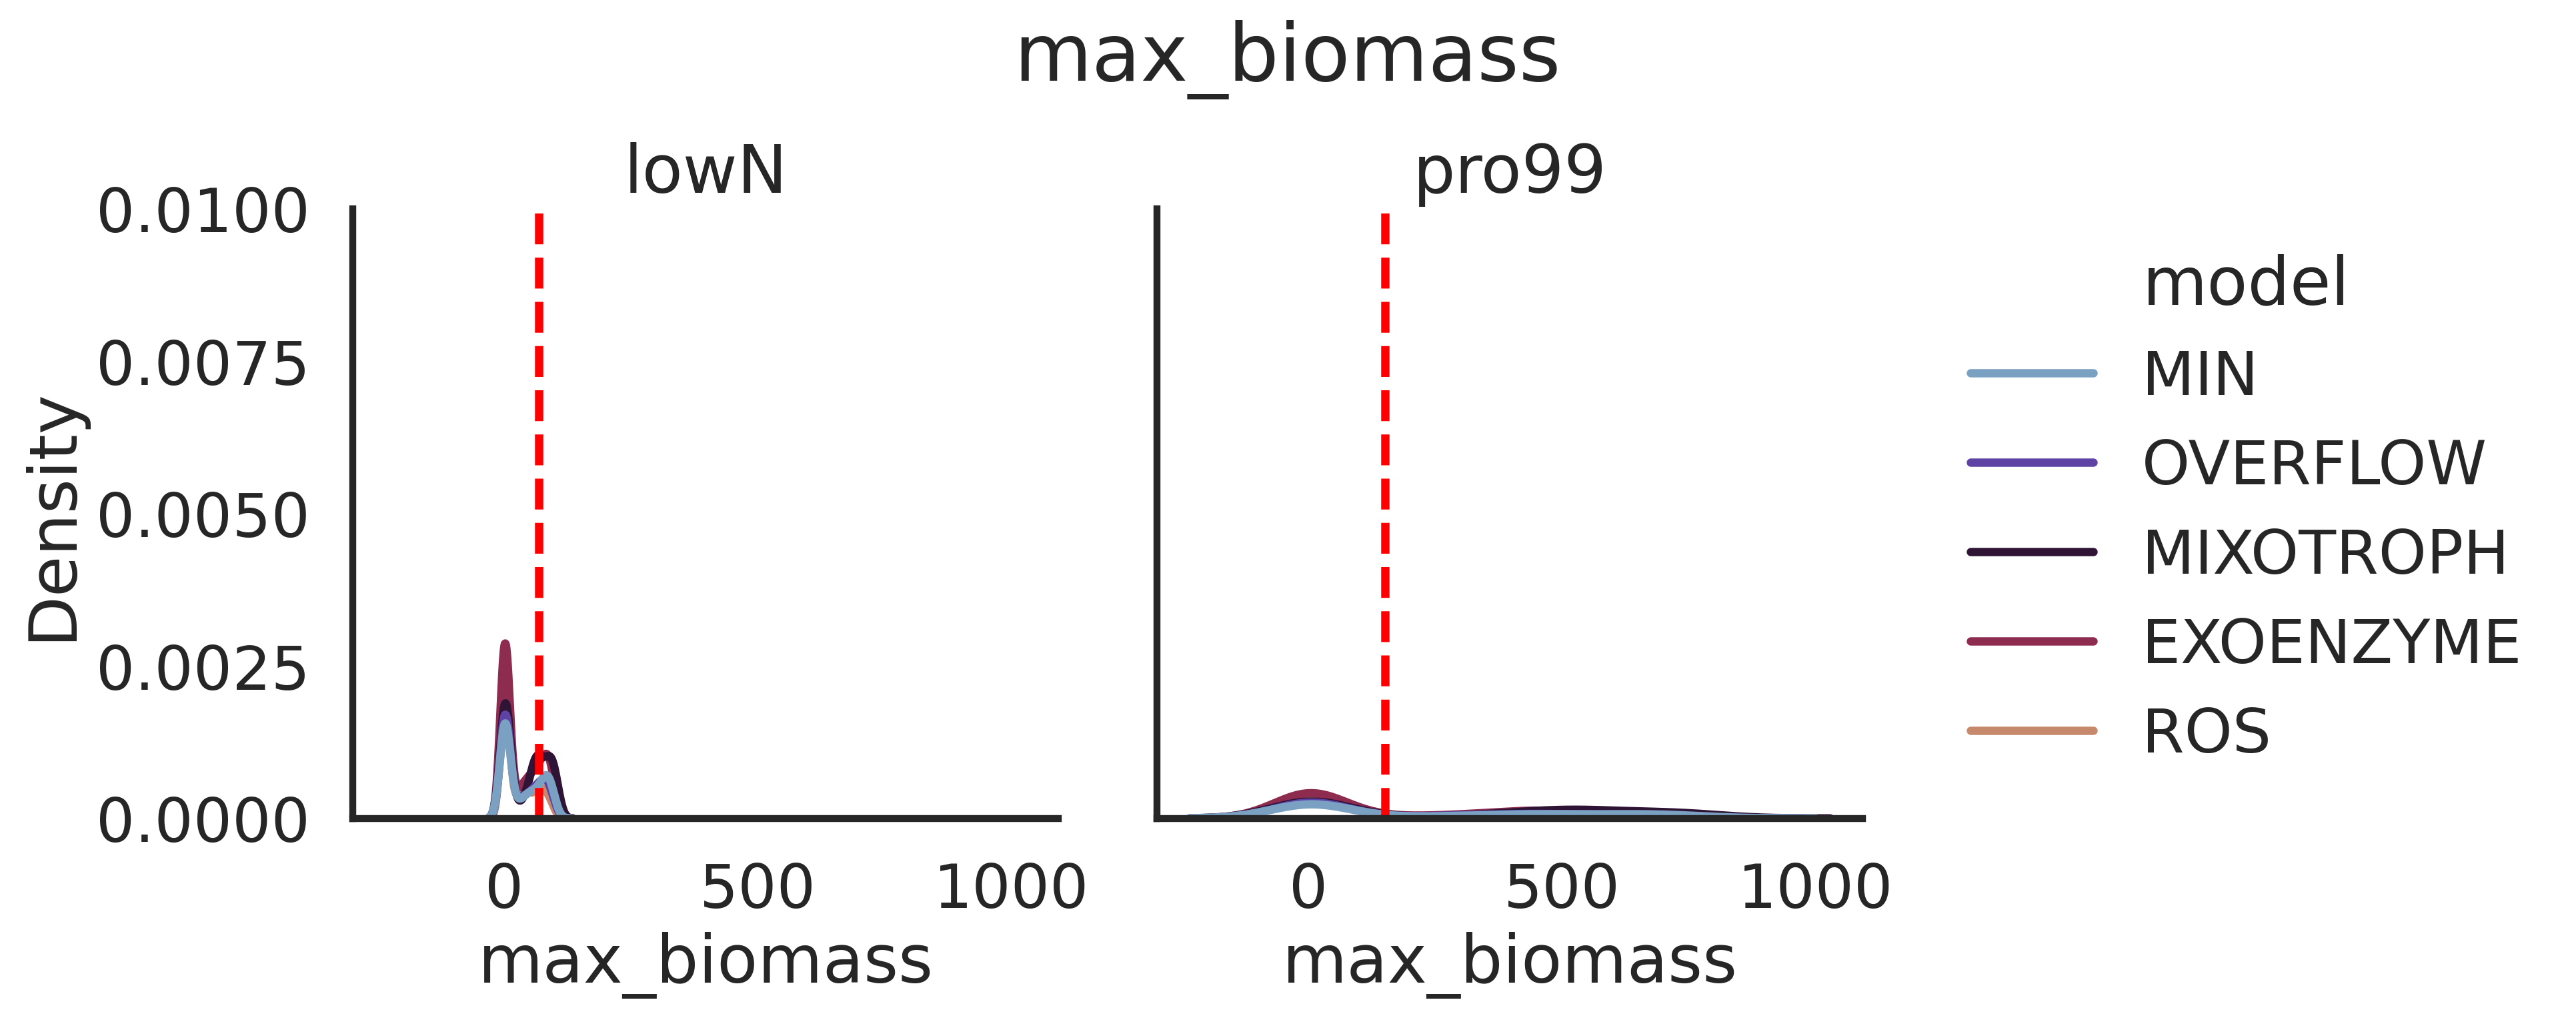

In [47]:

for col in [ 'last_day', 'max_day', 'max_biomass']:
    g = sns.displot(
        data=maxday_df,
        col='media', x=col, kind='kde', 
        hue='model', hue_order=morder, palette=mpalette, 
        col_order=media_order,
        #row='loss',
        #common_norm=True,
        #stat="density"
        #legend=False,
    )
    for (#row_val,
         col_val), ax in g.axes_dict.items():
        refmean = refmaxday_df.loc[refmaxday_df['media'].isin([col_val]), col].mean()
        ax.axvline(refmean, color='red', ls='--')
#         sns.kdeplot(
#             data=refmaxday_df.loc[refmaxday_df['media'].isin([col_val])],
#              x=col, color='red', ax=ax,
#                      legend=False
#                     )
    g.set(ylim=(0,0.01))
    g.set_titles(col_template='{col_name}', row_template='{row_name}')
    plt.suptitle(col, y=1.05)

In [48]:
def upper_bound(x):
    xmean = x.mean()
    xstd = x.std()
    if xstd == 0:
        # for max day
        xstd = 1
    return xmean + 10*xstd
def lower_bound(x):
    xmean = x.mean()
    xstd = x.std()
    if xstd == 0:
        # for max day
        xstd = 1
    return xmean - 10*xstd

bounds = refmaxday_df.groupby(['media'])[[ 'last_day', 'max_day', 'max_biomass']].agg(['mean', 'std', lower_bound, upper_bound, ]).T
bounds

media                          lowN       pro99
last_day    mean          26.778241   92.587500
            std            1.059368    1.152295
            lower_bound   16.184557   81.064551
            upper_bound   37.371925  104.110449
max_day     mean           7.984028    8.990972
            std            0.000000    0.000000
            lower_bound   -2.015972   -1.009028
            upper_bound   17.984028   18.990972
max_biomass mean          67.583713  150.965100
            std            4.096691    0.725192
            lower_bound   26.616802  143.713184
            upper_bound  108.550624  158.217015

In [49]:
for c in [ 'max_biomass']:
    mean_map = refmaxday_df.groupby(['media'])[c].mean()
    std_map = refmaxday_df.groupby(['media'])[c].std()
    maxday_df[f'{c}_distance'] = np.abs(maxday_df[c] - maxday_df['media'].map(mean_map)) /  maxday_df['media'].map(std_map)

for c in [ 'last_day',  'max_day']:
    mean_map = refmaxday_df.groupby(['media'])[c].mean()
    maxday_df[f'{c}_distance'] = np.abs(maxday_df[c] - maxday_df['media'].map(mean_map))

In [50]:
bounds

media                          lowN       pro99
last_day    mean          26.778241   92.587500
            std            1.059368    1.152295
            lower_bound   16.184557   81.064551
            upper_bound   37.371925  104.110449
max_day     mean           7.984028    8.990972
            std            0.000000    0.000000
            lower_bound   -2.015972   -1.009028
            upper_bound   17.984028   18.990972
max_biomass mean          67.583713  150.965100
            std            4.096691    0.725192
            lower_bound   26.616802  143.713184
            upper_bound  108.550624  158.217015

In [51]:

def _apply_bounds(x, col):
    media = x['media']
    lb = bounds.at[(col, 'lower_bound'), media]
    ub = bounds.at[(col, 'upper_bound'), media]
#     xmean = bounds.at[(col, 'mean'), media]
#     xstd = bounds.at[(col, 'std'), media]
#     if xstd == 0:
#         # for max day
#         xstd = 1
    val = x[col]
    return (val >= lb) and (val <= ub)
        
for c in [ 'last_day', 'max_day', 'max_biomass']:
    maxday_df[f'{c}_fit'] = maxday_df.apply(lambda x: _apply_bounds(x, c), axis=1)
maxday_df  


max_day  max_biomass      model  \
0      8.943750    98.638972  EXOENZYME   
1     15.016667   766.813877  EXOENZYME   
2      1.081944     1.023315  EXOENZYME   
3      1.934028     1.017503  EXOENZYME   
4      1.081944     1.022956  EXOENZYME   
...         ...          ...        ...   
5979   0.000000     0.892857        ROS   
5980  97.997917    24.725478        ROS   
5981  93.918056    21.035808        ROS   
5982   0.000000     0.892857        ROS   
5983   0.000000     0.892857        ROS   

                                                    idx  media    last_day  \
0     monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1...   lowN  128.767361   
1     monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1...  pro99   93.918056   
2     monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1...   lowN    0.000000   
3     monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1...  pro99    0.000000   
4     monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1...   lowN    0.000000   
...                                                 ...    ...         ...   
5979  monte2_ponly_ROS_vpro_97_23_ROS_C1__monte__98_ROS  pro99    0.000000   
5980  monte2_ponly_ROS_vpro_97_23_ROS_C1__monte__99_ROS   lowN  118.788889   
5981  monte2_ponly_ROS_vpro_97_23_ROS_C1__monte__99_ROS  pro99   93.918056   
5982   monte2_ponly_ROS_vpro_97_23_ROS_C1__monte__9_ROS   lowN    0.000000   
5983   monte2_ponly_ROS_vpro_97_23_ROS_C1__monte__9_ROS  pro99    0.000000   

       RMSE_lowN   RMSE_pro99        RMSE  max_biomass_distance  \
0     176.492338  1438.471840  503.864325              7.580571   
1     176.492338  1438.471840  503.864325            849.222251   
2      33.222216   136.544303   67.352093             16.247356   
3      33.222216   136.544303   67.352093            206.769649   
4      33.222508   136.544756   67.352500             16.247443   
...          ...          ...         ...                   ...   
5979   33.222876   136.546008   67.353181            206.941529   
5980   36.754155   136.830225   70.916001             10.461671   
5981   36.754155   136.830225   70.916001            179.165486   
5982   33.222876   136.546008   67.353181             16.279200   
5983   33.222876   136.546008   67.353181            206.941529   

      last_day_distance  max_day_distance  last_day_fit  max_day_fit  \
0            101.989120          0.959722         False         True   
1              1.330556          6.025694          True         True   
2             26.778241          6.902083         False         True   
3             92.587500          7.056944         False         True   
4             26.778241          6.902083         False         True   
...                 ...               ...           ...          ...   
5979          92.587500          8.990972         False         True   
5980          92.010648         90.013889         False        False   
5981           1.330556         84.927083          True        False   
5982          26.778241          7.984028         False         True   
5983          92.587500          8.990972         False         True   

      max_biomass_fit  
0                True  
1               False  
2               False  
3               False  
4               False  
...               ...  
5979            False  
5980            False  
5981            False  
5982            False  
5983            False  

[5984 rows x 15 columns]

In [52]:
maxday_df['last_day_fit'].value_counts(),  maxday_df['max_day_fit'].value_counts() , maxday_df['max_biomass_fit'].value_counts()

(False    4386
 True     1598
 Name: last_day_fit, dtype: int64,
 True     3158
 False    2826
 Name: max_day_fit, dtype: int64,
 False    4560
 True     1424
 Name: max_biomass_fit, dtype: int64)

In [53]:
(maxday_df['last_day_fit'] & maxday_df['max_day_fit'] & maxday_df['max_biomass_fit']).value_counts()

False    5954
True       30
dtype: int64

In [54]:
(#maxday_df['last_day_fit'] & 
 maxday_df['max_day_fit'] & maxday_df['max_biomass_fit']).value_counts()

False    5629
True      355
dtype: int64

In [55]:
maxday_df['score'] = maxday_df[[ 'last_day_fit', 
    'max_day_fit', 'max_biomass_fit']].sum(axis=1)


In [56]:
maxday_df[[ 'model', 'score',]].value_counts()

model      score
EXOENZYME  1        1380
MIXOTROPH  1        1157
ROS        1         901
MIN        1         864
OVERFLOW   1         862
EXOENZYME  2         146
MIXOTROPH  2         133
           0         100
OVERFLOW   2          77
MIN        2          74
EXOENZYME  0          67
ROS        0          58
OVERFLOW   0          53
MIN        0          49
ROS        2          33
MIXOTROPH  3           8
OVERFLOW   3           8
EXOENZYME  3           7
ROS        3           4
MIN        3           3
dtype: int64

In [57]:
maxday_df.columns

Index(['max_day', 'max_biomass', 'model', 'idx', 'media', 'last_day',
       'RMSE_lowN', 'RMSE_pro99', 'RMSE', 'max_biomass_distance',
       'last_day_distance', 'max_day_distance', 'last_day_fit', 'max_day_fit',
       'max_biomass_fit', 'score'],
      dtype='object')

In [58]:
value_vars = [
    'max_day', 'max_biomass','last_day',
    'last_day_fit',
       'max_day_fit', 'max_biomass_fit', 'score', 'last_day_distance',
       'max_biomass_distance', 'max_day_distance']

id_vars = [ 'model', 'idx', 
       'RMSE_lowN', 'RMSE_pro99', 'RMSE', ]

pmaxday_df = maxday_df.pivot_table( columns='media', index=id_vars)
pmaxday_df.columns = ['_'.join(col).strip() for col in pmaxday_df.columns.values]
pmaxday_df = pmaxday_df.reset_index()

In [59]:
pmaxday_df.head()

model                                                idx   RMSE_lowN  \
0  EXOENZYME  monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1...  176.492338   
1  EXOENZYME  monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1...   33.222216   
2  EXOENZYME  monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1...   33.222508   
3  EXOENZYME  monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1...   33.222841   
4  EXOENZYME  monte2_ponly_EXOENZYME_vpro_13_69_EXOENZYME_C1...   34.246805   

    RMSE_pro99        RMSE  last_day_lowN  last_day_pro99  \
0  1438.471840  503.864325     128.767361       93.918056   
1   136.544303   67.352093       0.000000        0.000000   
2   136.544756   67.352500       0.000000        0.000000   
3   136.545654   67.353059       0.000000        0.000000   
4   136.112194   68.274503     128.767361       93.918056   

   last_day_distance_lowN  last_day_distance_pro99  last_day_fit_lowN  ...  \
0              101.989120                 1.330556                0.0  ...   
1               26.778241                92.587500                0.0  ...   
2               26.778241                92.587500                0.0  ...   
3               26.778241                92.587500                0.0  ...   
4              101.989120                 1.330556                0.0  ...   

   max_biomass_fit_lowN  max_biomass_fit_pro99  max_day_lowN  max_day_pro99  \
0                   1.0                    0.0      8.943750      15.016667   
1                   0.0                    0.0      1.081944       1.934028   
2                   0.0                    0.0      1.081944       1.934028   
3                   0.0                    0.0      0.000000       0.000000   
4                   0.0                    0.0    128.767361      93.918056   

   max_day_distance_lowN  max_day_distance_pro99  max_day_fit_lowN  \
0               0.959722                6.025694               1.0   
1               6.902083                7.056944               1.0   
2               6.902083                7.056944               1.0   
3               7.984028                8.990972               1.0   
4             120.783333               84.927083               0.0   

   max_day_fit_pro99  score_lowN  score_pro99  
0                1.0           2            2  
1                1.0           1            1  
2                1.0           1            1  
3                1.0           1            1  
4                0.0           0            1  

[5 rows x 25 columns]

In [60]:
pmaxday_df[[ 'score_lowN','score_pro99']].value_counts()

score_lowN  score_pro99
1           1              2362
2           1               238
0           1               170
2           2               100
0           0                67
3           1                16
1           0                12
3           2                12
2           0                 5
0           2                 4
1           2                 4
3           0                 2
dtype: int64

In [61]:
pmaxday_df.columns

Index(['model', 'idx', 'RMSE_lowN', 'RMSE_pro99', 'RMSE', 'last_day_lowN',
       'last_day_pro99', 'last_day_distance_lowN', 'last_day_distance_pro99',
       'last_day_fit_lowN', 'last_day_fit_pro99', 'max_biomass_lowN',
       'max_biomass_pro99', 'max_biomass_distance_lowN',
       'max_biomass_distance_pro99', 'max_biomass_fit_lowN',
       'max_biomass_fit_pro99', 'max_day_lowN', 'max_day_pro99',
       'max_day_distance_lowN', 'max_day_distance_pro99', 'max_day_fit_lowN',
       'max_day_fit_pro99', 'score_lowN', 'score_pro99'],
      dtype='object')

In [62]:
mean_scores_filtered = pmaxday_df.sort_values(
    by=['score_lowN', 'score_pro99', 'RMSE'],
    ascending=[False, False, True]
)
#pmaxday_df #.loc[pmaxday_df[f'score_4'].ge(4)].copy()

In [63]:
mean_scores_filtered = pmaxday_df.sort_values(
    by='RMSE',
)
#pmaxday_df #.loc[pmaxday_df[f'score_4'].ge(4)].copy()

In [64]:
mean_scores_filtered['lrank'] = mean_scores_filtered.groupby("model")["RMSE"].rank(method='first')
mean_scores_filtered['fit'] = 'bad'
#mean_scores_filtered.loc[mean_scores_filtered.lrank.le(100), 'fit'] = 'good'
mean_scores_filtered.loc[mean_scores_filtered.RMSE.le(70), 'fit'] = 'good'
    


In [88]:
mean_scores_filtered['lrank'] = mean_scores_filtered.groupby("model")["RMSE"].rank(method='first')
mean_scores_filtered['fit'] = 'bad'
#mean_scores_filtered.loc[mean_scores_filtered.lrank.le(100), 'fit'] = 'good'
mean_scores_filtered.loc[mean_scores_filtered.RMSE.le(60), 'fit'] = 'good'



In [89]:
mean_scores_filtered.fit.value_counts()

bad     2981
good      11
Name: fit, dtype: int64

In [90]:
bestids = mean_scores_filtered.loc[mean_scores_filtered.fit.isin(['good']), 'idx']

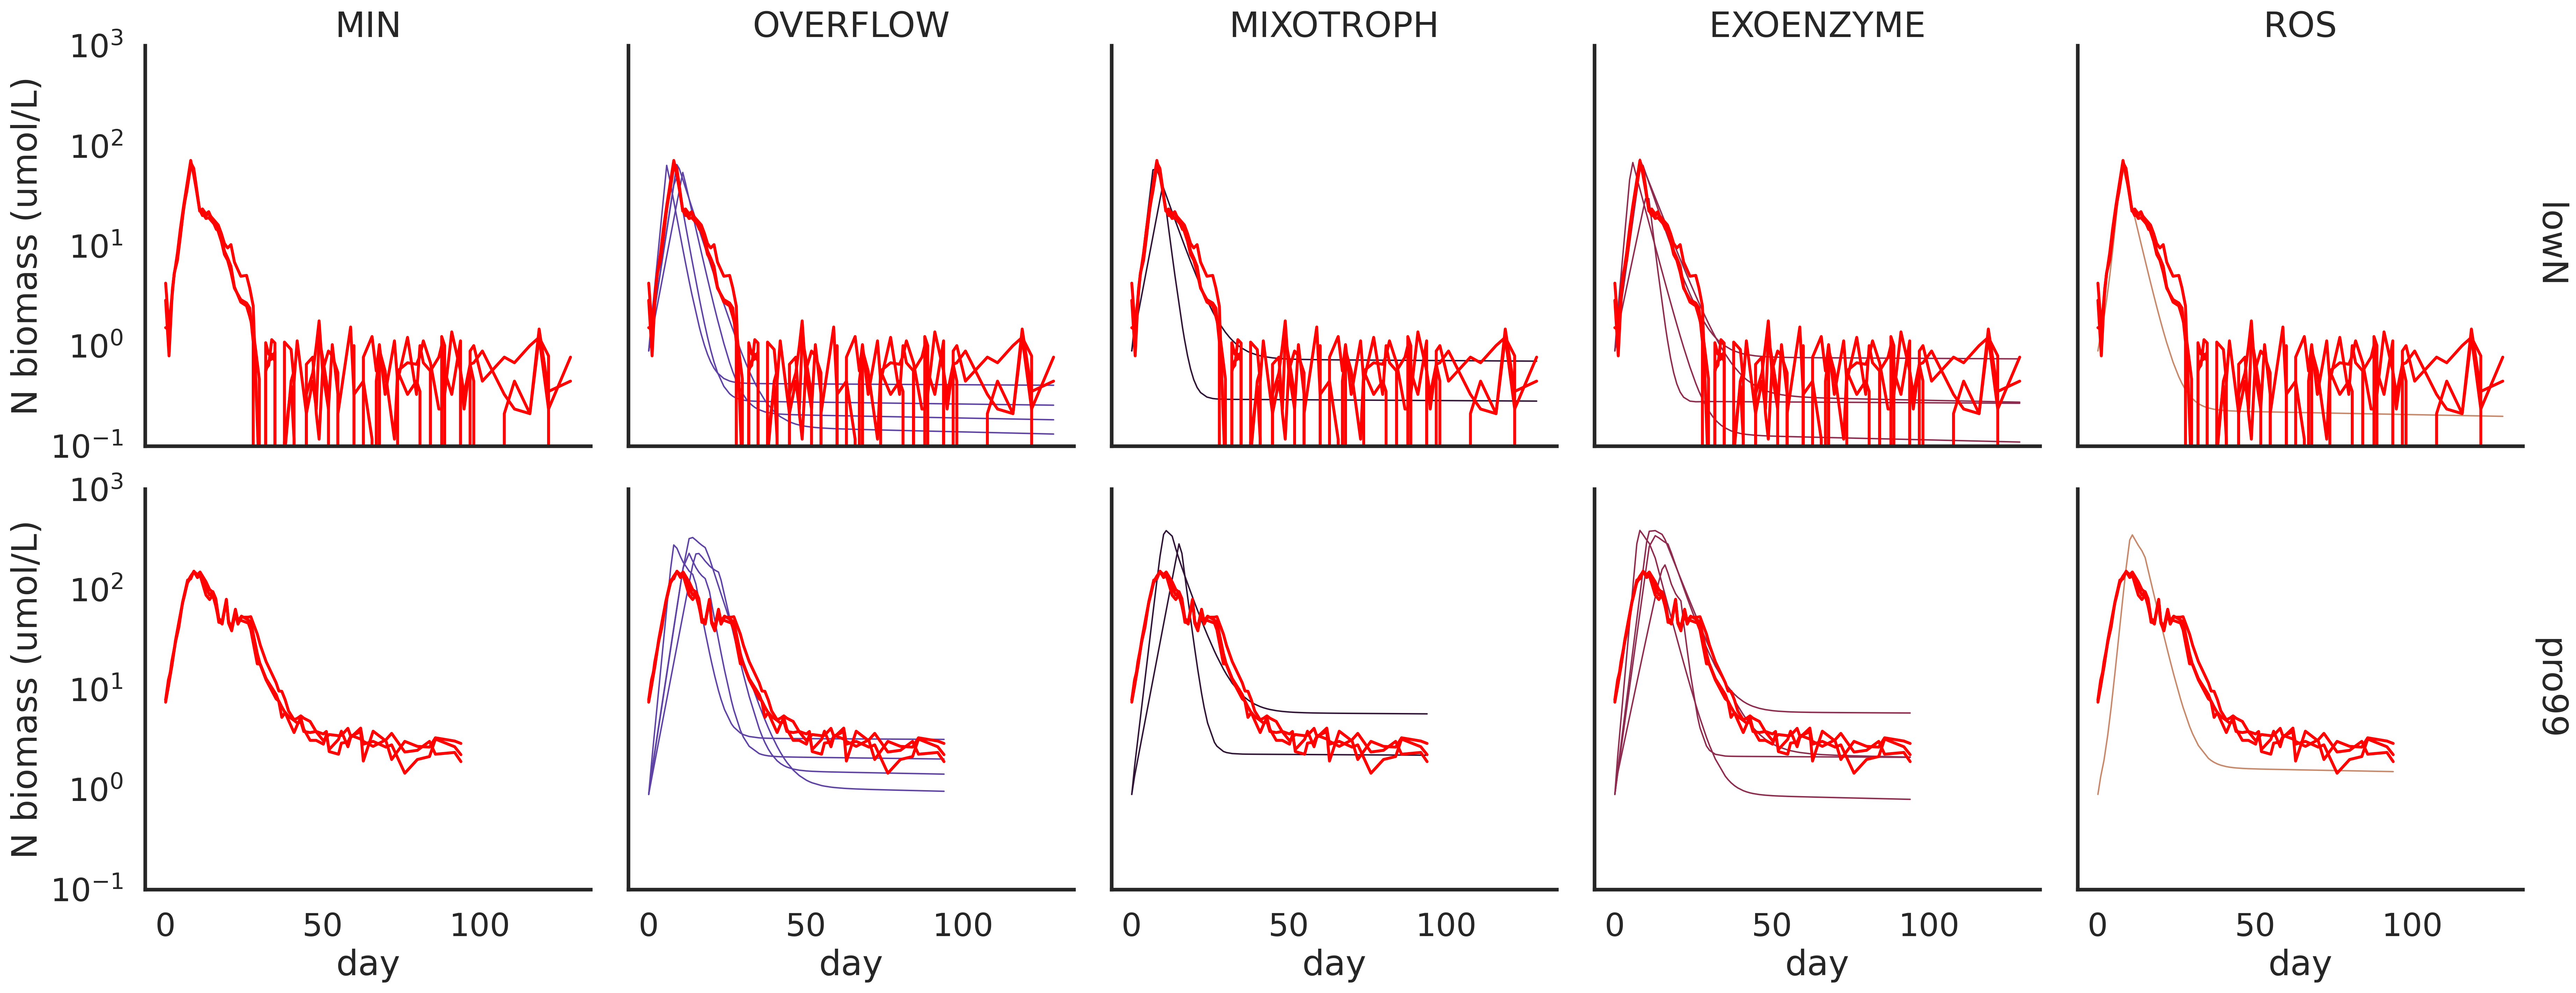

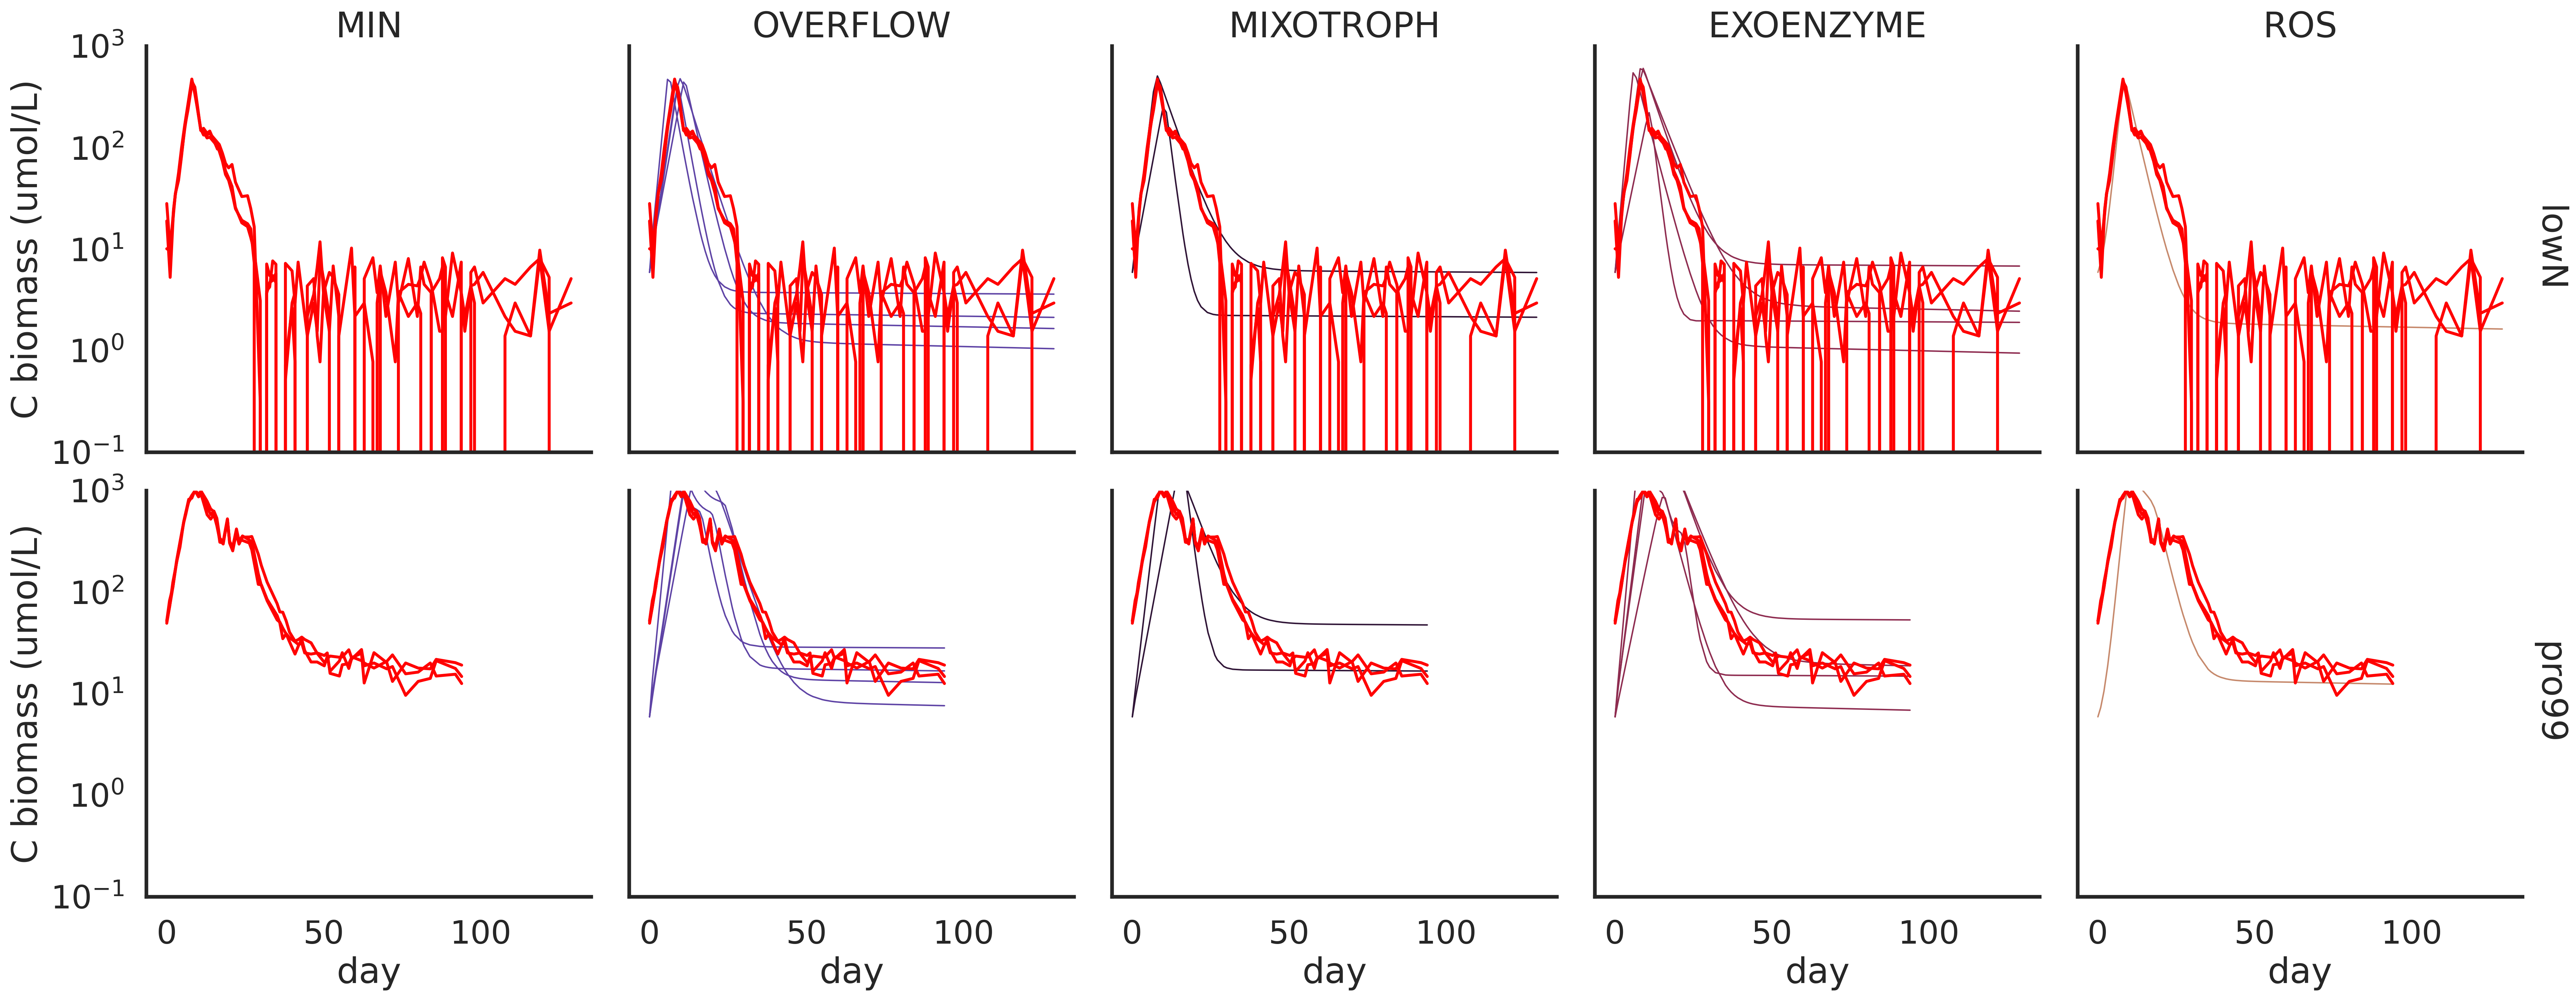

In [91]:
for n in ('N', 'C'):
    l= 'RMSE'
    g = sns.relplot(
        data=df.loc[df.idx.isin(bestids)],
        kind='line', 
        estimator=None, units='idx',
        x='day', y=f'Bptotal[{n}]', 
        row='media', row_order=media_order, lw=1,
        hue='model', hue_order=morder, palette=mpalette,
        col='model', col_order=morder, 
        facet_kws=dict( margin_titles=True),
        legend=False
    )
    for (row_val,col_val), ax in g.axes_dict.items():
        datadf = refdf if row_val == 'lowN' else refp99df
        sns.lineplot(data=datadf, x='day', y=f'ref_Bp[{n}]',
        units='Sample', estimator=None, ax=ax, lw=2, color='red',

                     legend=False
                    )
    g.set(yscale='log', ylim=(1e-1,1e3))
    g.set(ylabel=f'{n} biomass (umol/L)')
    g.set_titles(col_template='{col_name}', row_template='{row_name}')
    #plt.suptitle(f'{n} - top models ({l})', y=1.03)

In [65]:
#mean_scores_filtered.loc[mean_scores_filtered.model.isin(['ROS'])].nsmallest(n=30, columns='RMSE')
mean_scores_filtered.nsmallest(n=30, columns='RMSE')


model                                                idx  RMSE_lowN  \
2690        ROS  monte2_ponly_ROS_vpro_23_17_ROS_C1__monte__97_ROS   9.020635   
2139   OVERFLOW  monte2_ponly_OVERFLOW_vpro_44_79_OVERFLOW_C1__...  13.113573   
1416  MIXOTROPH  monte2_ponly_MIXOTROPH_vpro_54_14_MIXOTROPH_C2...  10.526510   
2075   OVERFLOW  monte2_ponly_OVERFLOW_vpro_40_8_OVERFLOW_C2__m...  24.540856   
711   EXOENZYME  monte2_ponly_EXOENZYME_vpro_93_20_EXOENZYME_C3...  23.541747   
604   EXOENZYME  monte2_ponly_EXOENZYME_vpro_77_45_EXOENZYME_C3...  23.898070   
335   EXOENZYME  monte2_ponly_EXOENZYME_vpro_58_74_EXOENZYME_C1...  15.786964   
1452  MIXOTROPH  monte2_ponly_MIXOTROPH_vpro_54_14_MIXOTROPH_C2...  21.210239   
2234   OVERFLOW  monte2_ponly_OVERFLOW_vpro_75_20_OVERFLOW_C3__...  18.192169   
625   EXOENZYME  monte2_ponly_EXOENZYME_vpro_77_45_EXOENZYME_C3...  16.169943   
2435   OVERFLOW  monte2_ponly_OVERFLOW_vpro_94_22_OVERFLOW_C2__...  24.716697   
730   EXOENZYME  monte2_ponly_EXOENZYME_vpro_93_20_EXOENZYME_C3...  28.582286   
966         MIN  monte2_ponly_MIN_vpro_64_97_MIN_C1__monte__73_MIN  31.182926   
2309   OVERFLOW  monte2_ponly_OVERFLOW_vpro_84_99_OVERFLOW_C3__...  23.718883   
1772  MIXOTROPH  monte2_ponly_MIXOTROPH_vpro_78_38_MIXOTROPH_C2...  25.944194   
1959  MIXOTROPH  monte2_ponly_MIXOTROPH_vpro_97_13_MIXOTROPH_C2...  31.498784   
2050   OVERFLOW  monte2_ponly_OVERFLOW_vpro_40_8_OVERFLOW_C2__m...  31.386318   
1842  MIXOTROPH  monte2_ponly_MIXOTROPH_vpro_87_65_MIXOTROPH_C2...  32.083252   
1330  MIXOTROPH  monte2_ponly_MIXOTROPH_vpro_100_5_MIXOTROPH_C1...  31.968552   
1763  MIXOTROPH  monte2_ponly_MIXOTROPH_vpro_78_38_MIXOTROPH_C2...  32.027818   
1425  MIXOTROPH  monte2_ponly_MIXOTROPH_vpro_54_14_MIXOTROPH_C2...  32.416769   
1389  MIXOTROPH  monte2_ponly_MIXOTROPH_vpro_100_5_MIXOTROPH_C1...  32.374683   
1651  MIXOTROPH  monte2_ponly_MIXOTROPH_vpro_78_20_MIXOTROPH_C3...  32.420672   
1305  MIXOTROPH  monte2_ponly_MIXOTROPH_vpro_100_5_MIXOTROPH_C1...  32.407397   
1309  MIXOTROPH  monte2_ponly_MIXOTROPH_vpro_100_5_MIXOTROPH_C1...  32.410079   
1300  MIXOTROPH  monte2_ponly_MIXOTROPH_vpro_100_5_MIXOTROPH_C1...  32.469795   
1537  MIXOTROPH  monte2_ponly_MIXOTROPH_vpro_75_15_MIXOTROPH_C2...  32.515747   
1677  MIXOTROPH  monte2_ponly_MIXOTROPH_vpro_78_20_MIXOTROPH_C3...  32.535115   
2332   OVERFLOW  monte2_ponly_OVERFLOW_vpro_84_99_OVERFLOW_C3__...  31.582017   
1302  MIXOTROPH  monte2_ponly_MIXOTROPH_vpro_100_5_MIXOTROPH_C1...  32.531940   

      RMSE_pro99       RMSE  last_day_lowN  last_day_pro99  \
2690  113.363652  31.978308      18.711806       31.955556   
2139   92.687563  34.863521      16.727083       31.955556   
1416  148.916674  39.592585      23.898611       93.918056   
2075   70.049618  41.461761      13.695833       93.918056   
711   109.346680  50.736691      13.695833       30.120833   
604   119.070859  53.343825      17.727083       30.120833   
335   181.668969  53.553725      25.734722       93.918056   
1452  142.178310  54.914806      13.695833       29.145139   
2234  179.906868  57.209231      23.898611       40.843750   
625   209.487367  58.201364      26.747222       57.973611   
2435  143.509823  59.557441      20.778472       38.030556   
730   133.134596  61.687041      20.778472       93.918056   
966   132.886621  64.372305      21.880556       43.930556   
2309  176.644903  64.728818      23.898611       93.918056   
1772  162.423517  64.914923      27.852778       62.875000   
1959  133.929614  64.950905      26.747222       27.083333   
2050  135.963885  65.325383      21.880556       43.930556   
1842  134.419623  65.670531      73.768750       71.883333   
1330  134.972211  65.687641      62.892361       62.875000   
1763  134.978328  65.749991      23.898611       24.114583   
1425  135.096130  66.176884      47.918750       47.881250   
1389  135.436892  66.217267      19.711111       20.008333   
1651  135.387173  66.252118      26.747222       26.293056   
1305  135.

In [66]:
cols = ['last_day_lowN',
 'last_day_pro99',
 'max_biomass_lowN',
 'max_biomass_pro99',
 'max_day_lowN',
 'max_day_pro99']

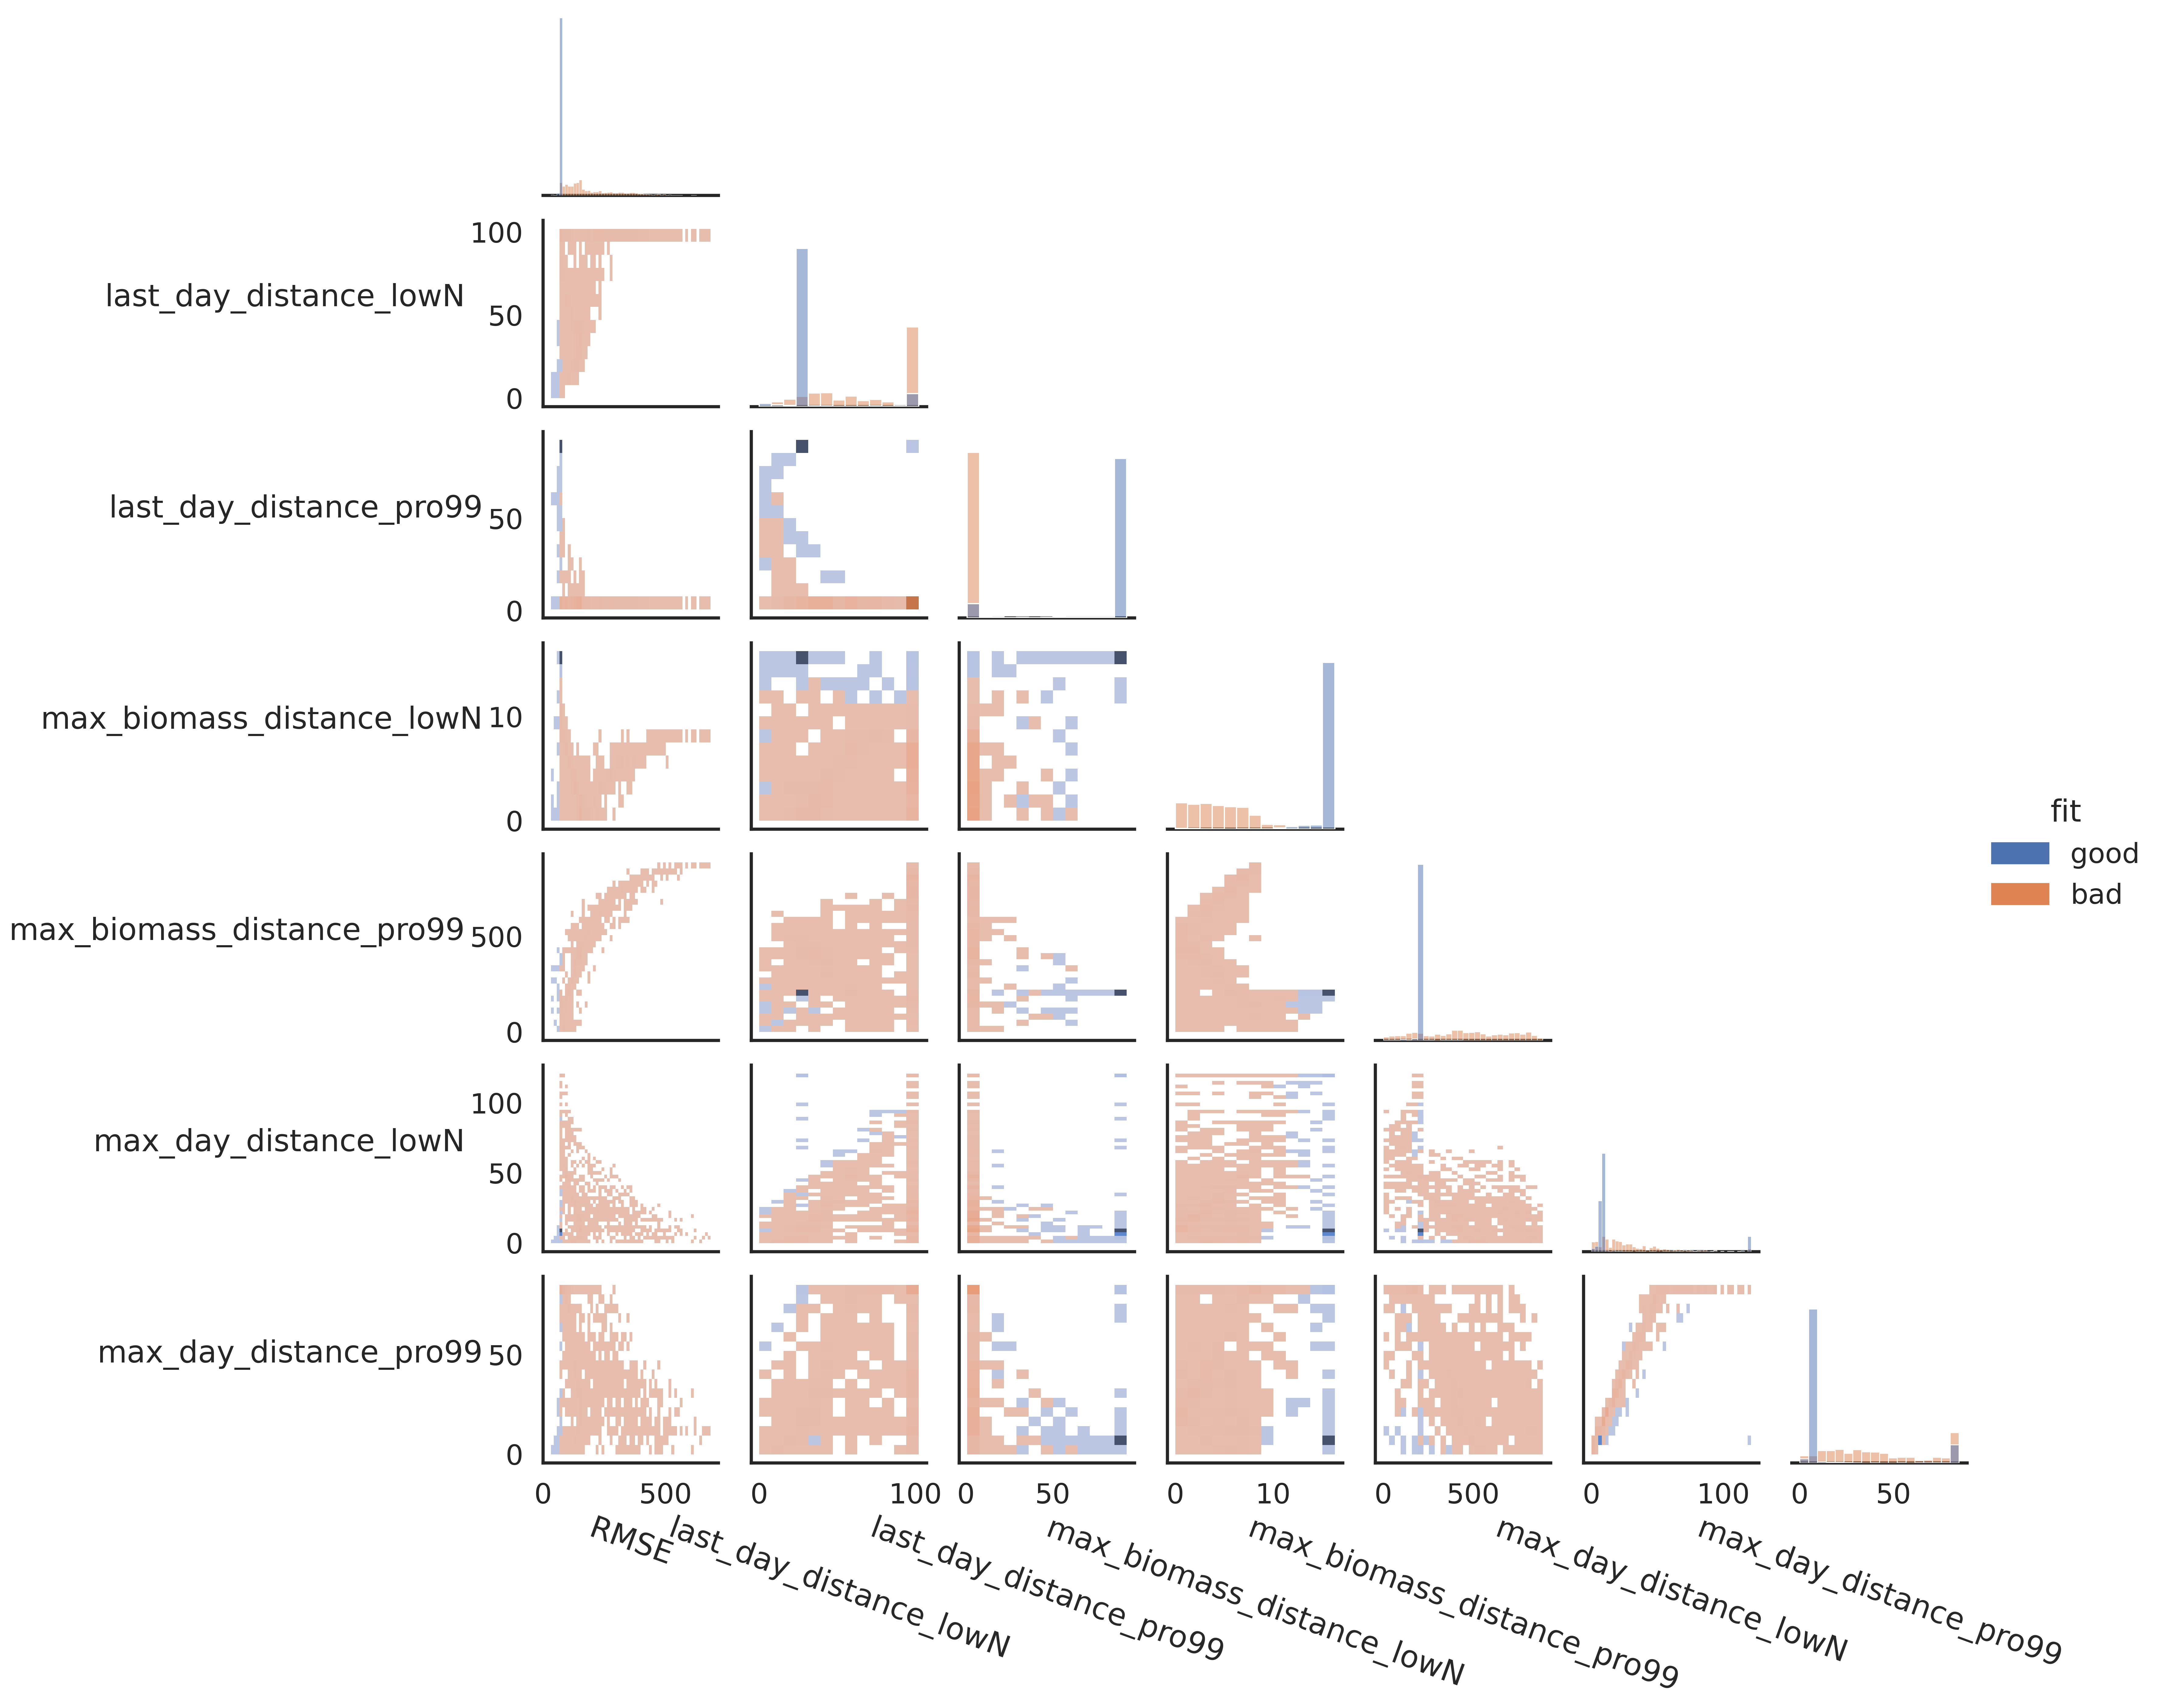

In [67]:


distance_cols = [c for c in pmaxday_df.columns.values if '_distance' in c]
g = sns.pairplot(
    data=mean_scores_filtered,
    vars = ['RMSE'] + distance_cols,
    #col='media', x=col, kind='kde', 
    hue='fit', #hue_order=media_order, #palette=ggpalette,
     kind="hist",
    corner=True,
    #col_order=media_order,
    #row='loss',
    #common_norm=True,
    #stat="density"
    #legend=False,
)


for ax in g.axes.flatten():
    if ax:
        # rotate x axis labels
        ax.set_xlabel(ax.get_xlabel(), rotation = -20)
        # rotate y axis labels
        ax.set_ylabel(ax.get_ylabel(), rotation = 0)
        # set y labels alignment
        ax.yaxis.get_label().set_horizontalalignment('right')


/home/oweissberg/work/tools/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'lw'
  cset = contour_func(
/home/oweissberg/work/tools/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'lw'
  cset = contour_func(
/tmp/ipykernel_19725/896052388.py:13: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/tmp/ipykernel_19725/896052388.py:13: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/tmp/ipykernel_19725/896052388.py:13: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/tmp/ipykernel_19725/896052388.py:13: UserWarning: KDE cannot be estimated (0 variance or perf

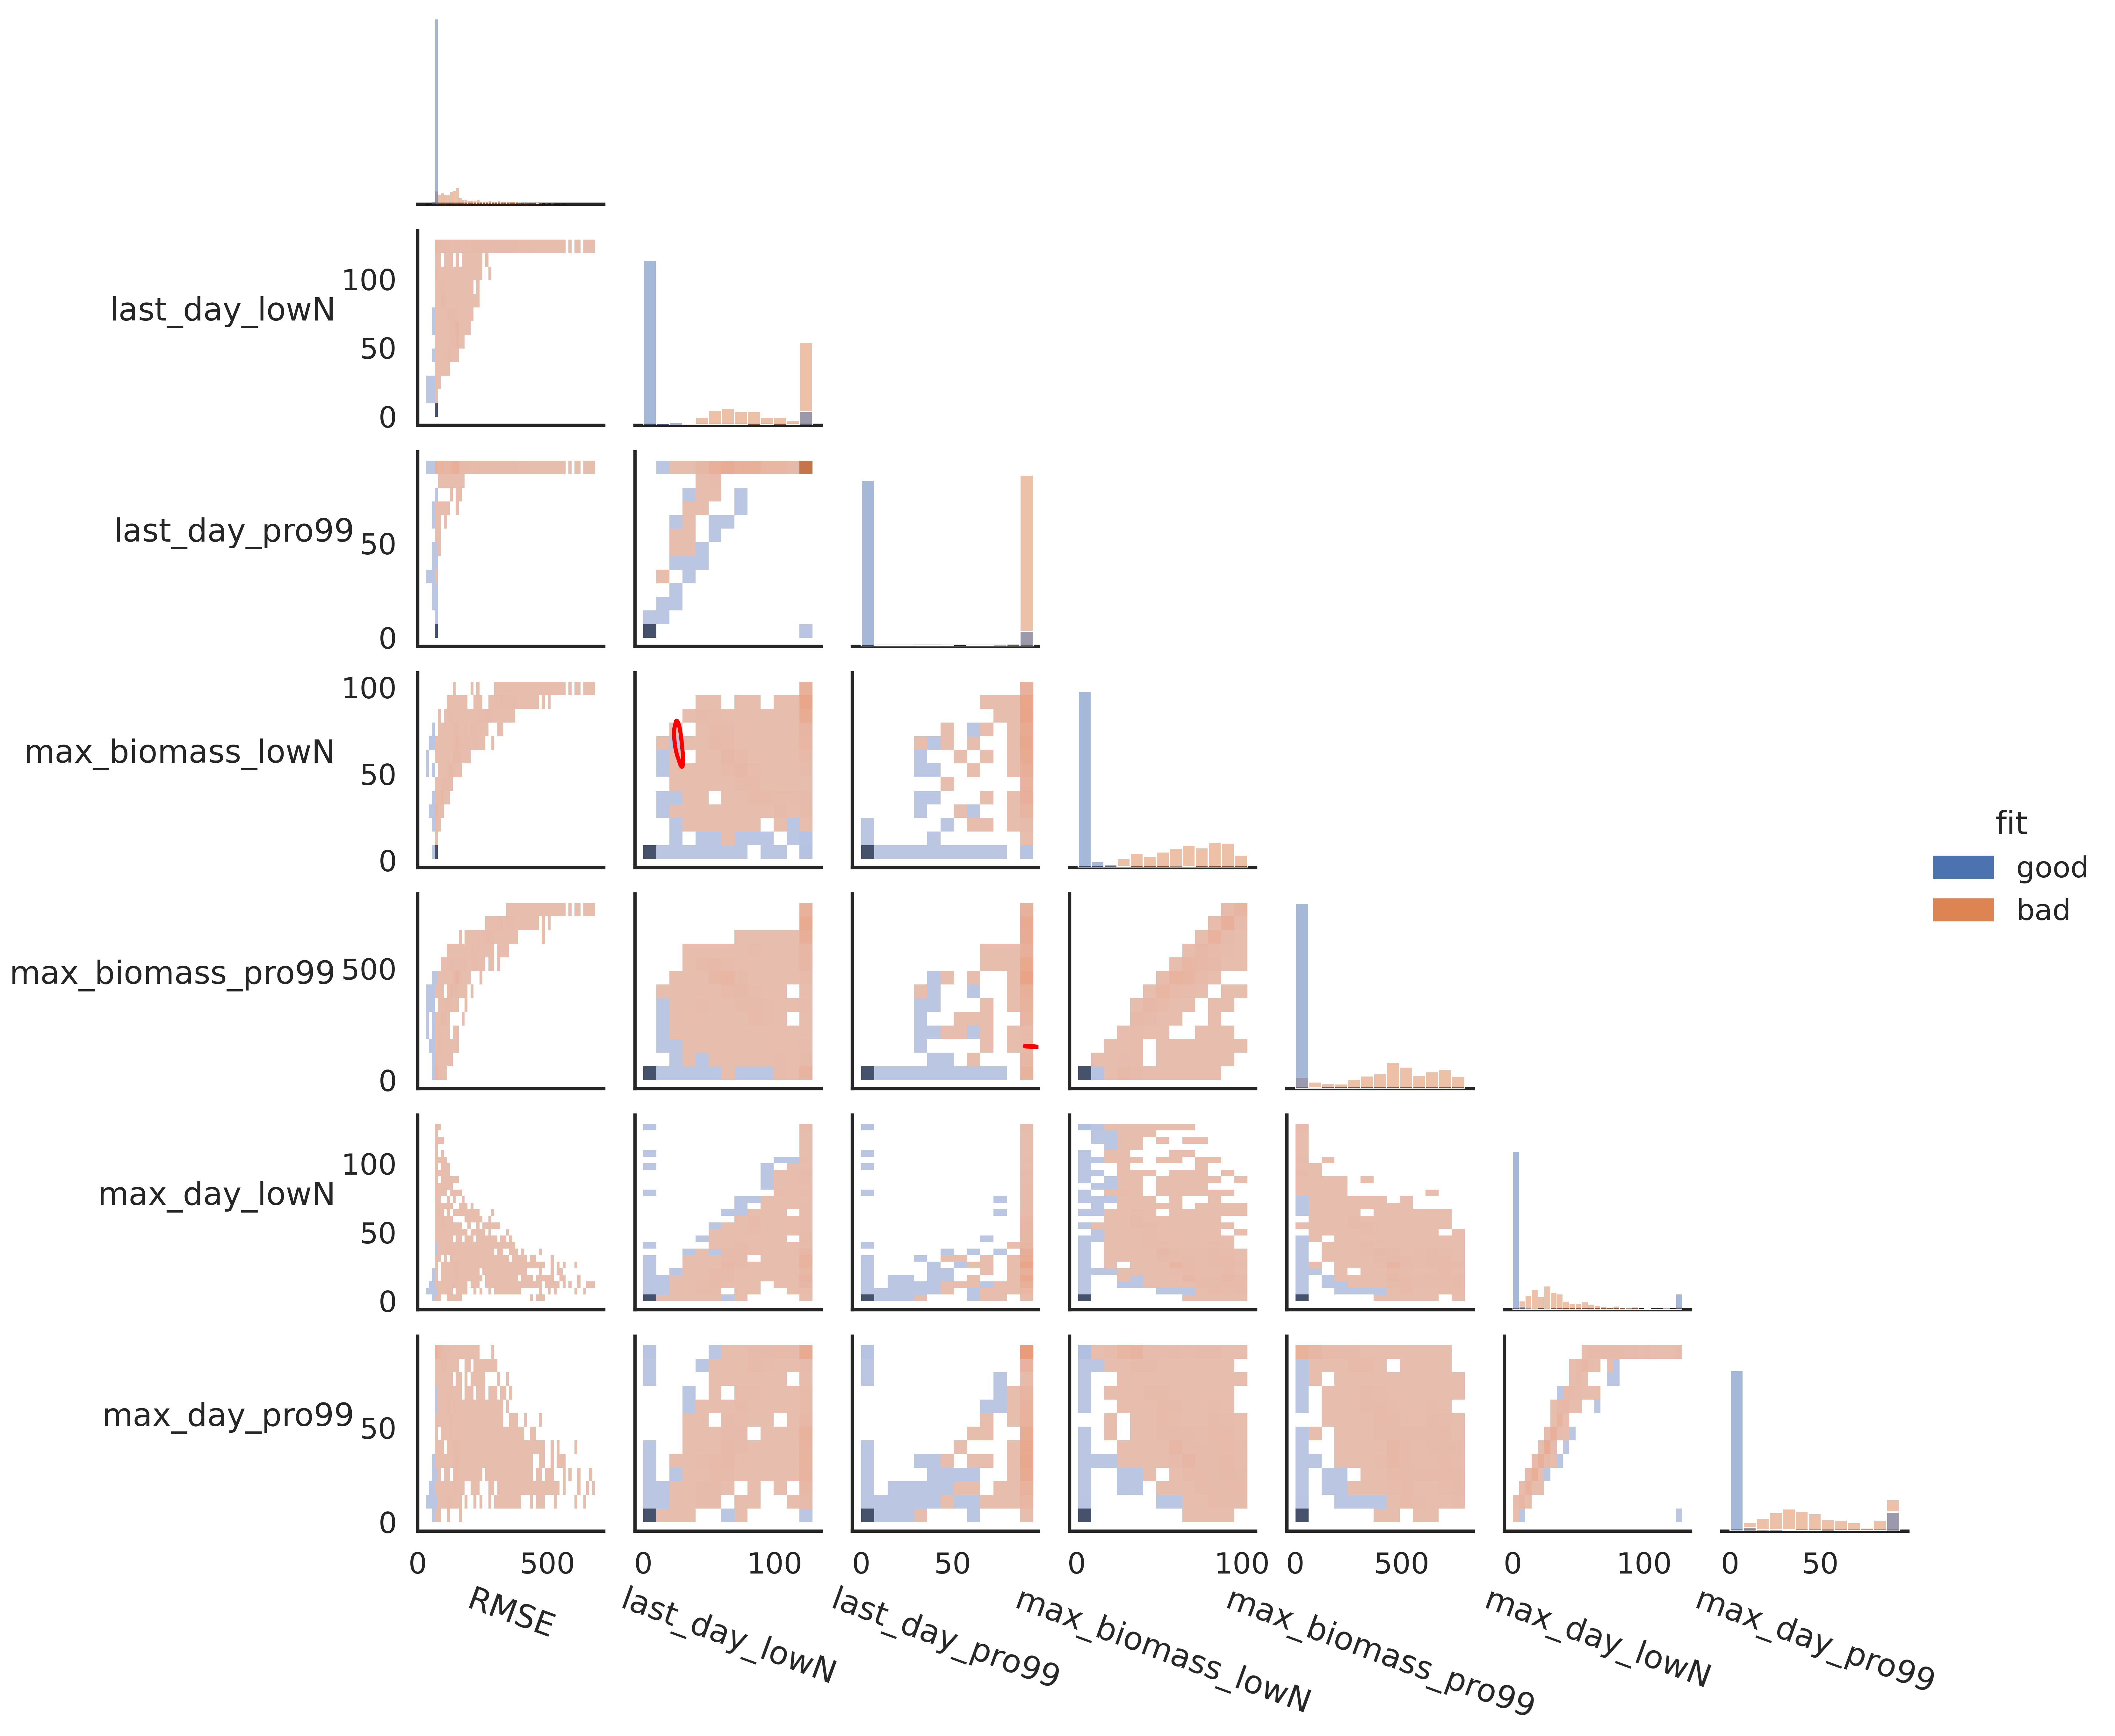

In [68]:
def plot_extra(x, y, **kwargs):
    if kwargs['label'] == 'good':
     #     sns.regplot(data=kwargs['data'], x=x.name, y=y.name, lowess=True, scatter=False, color=kwargs['color'])
        xname = x.name.rsplit('_', 1)
        yname = y.name.rsplit('_', 1)
        if (len(xname) ==2 and 
            len(yname) ==2 and  
            xname[1] in media_order and 
            xname[0] in refmaxday_df.columns and
           yname[1] in media_order and 
            yname[0] in refmaxday_df.columns and 
            xname[1]==yname[1]):
            sns.kdeplot(
                data=refmaxday_df.loc[refmaxday_df['media'].isin([xname[1]])],
                x=xname[0], y=yname[0], color='red',
                levels=1, thresh=0.01, lw=0.5,
                         legend=False
            )

#distance_cols = [c for c in pmaxday_df.columns.values if '_distance' in c]
g = sns.pairplot(
    data=mean_scores_filtered,
    vars = ['RMSE'] + cols,
    #col='media', x=col, kind='kde', 
    hue='fit', #hue_order=media_order, #palette=ggpalette,
     kind="hist",
    corner=True,
    #col_order=media_order,
    #row='loss',
    #common_norm=True,
    #stat="density"
    #legend=False,
)
g.map_offdiag(plot_extra)

#     for (#row_val,
#          col_val), ax in g.axes_dict.items():
#         sns.kdeplot(
#             data=refmaxday_df.loc[refmaxday_df['media'].isin([col_val])],
#              x=col, color='red', ax=ax,
#                      legend=False
#                     )
#     g.set(ylim=(0,0.01))
#     g.set_titles(col_template='{col_name}', row_template='{row_name}')
for ax in g.axes.flatten():
    if ax:
        # rotate x axis labels
        ax.set_xlabel(ax.get_xlabel(), rotation = -20)
        # rotate y axis labels
        ax.set_ylabel(ax.get_ylabel(), rotation = 0)
        # set y labels alignment
        ax.yaxis.get_label().set_horizontalalignment('right')


In [69]:
bestids = mean_scores_filtered.loc[mean_scores_filtered.fit.isin(['good']), 'idx']

In [71]:
bestids

2690    monte2_ponly_ROS_vpro_23_17_ROS_C1__monte__97_ROS
2139    monte2_ponly_OVERFLOW_vpro_44_79_OVERFLOW_C1__...
1416    monte2_ponly_MIXOTROPH_vpro_54_14_MIXOTROPH_C2...
2075    monte2_ponly_OVERFLOW_vpro_40_8_OVERFLOW_C2__m...
711     monte2_ponly_EXOENZYME_vpro_93_20_EXOENZYME_C3...
                              ...                        
986     monte2_ponly_MIN_vpro_64_97_MIN_C1__monte__91_MIN
2069    monte2_ponly_OVERFLOW_vpro_40_8_OVERFLOW_C2__m...
515     monte2_ponly_EXOENZYME_vpro_75_68_EXOENZYME_C2...
1613    monte2_ponly_MIXOTROPH_vpro_78_20_MIXOTROPH_C3...
126     monte2_ponly_EXOENZYME_vpro_19_83_EXOENZYME_C1...
Name: idx, Length: 1544, dtype: object

In [70]:
sns.displot(
    data=mean_scores_filtered.loc[mean_scores_filtered.fit.isin(['good'])],
    x='RMSE',
    col='model', col_order=morder,
)


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x7fe16961c680> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x7fe149914fe0> (for post_execute):



KeyboardInterrupt



In [ ]:
sns.displot(
    data=mean_scores_filtered.loc[mean_scores_filtered.fit.isin(['good'])],
    x='RMSE_lowN', y='RMSE_pro99',
    col='model', col_order=morder,
)

In [ ]:
mean_scores_filtered.loc[mean_scores_filtered.idx.isin(bestids)].model.value_counts()


In [ ]:
mean_scores_filtered.model.value_counts()


In [ ]:
mean_scores_filtered.loc[mean_scores_filtered.RMSE.le(66),cols].describe()


In [ ]:
mean_scores_filtered.loc[
    mean_scores_filtered.idx.isin(bestids) 
    #mean_scores_filtered.RMSE.ge(55) &
    #mean_scores_filtered.RMSE.le(60) 
                         ,cols].describe()


In [ ]:
mean_scores_filtered.loc[
    #mean_scores_filtered.idx.isin(bestids) 
    mean_scores_filtered.RMSE.le(55) &
    mean_scores_filtered.RMSE.le(60) 
                         ,'max_day_distance_lowN'].describe()


In [ ]:
for n in ('N', 'C'):
    l= 'RMSE'
    g = sns.relplot(
        data=df.loc[df.idx.isin(bestids)],
        kind='line', 
        estimator=None, units='idx',
        x='day', y=f'Bptotal[{n}]', 
        row='media', row_order=media_order, lw=1,
        hue='model', hue_order=morder, palette=mpalette,
        col='model', col_order=morder, 
        facet_kws=dict( margin_titles=True),
        legend=False
    )
    for (row_val,col_val), ax in g.axes_dict.items():
        datadf = refdf if row_val == 'lowN' else refp99df
        sns.lineplot(data=datadf, x='day', y=f'ref_Bp[{n}]',
        units='Sample', estimator=None, ax=ax, lw=2, color='red',

                     legend=False
                    )
    g.set(yscale='log', ylim=(1e-1,1e3))
    g.set(ylabel=f'{n} biomass (umol/L)')
    g.set_titles(col_template='{col_name}', row_template='{row_name}')
    #plt.suptitle(f'{n} - top models ({l})', y=1.03)

In [ ]:
for n in ('N', 'C'):
    l= 'RMSE'
    g = sns.relplot(
        data=df.loc[df.idx.isin(bestids)],
        kind='line', 
        estimator=None, units='idx',
        x='day', y=f'Bptotal[{n}]', 
        row='media', row_order=media_order, lw=1,
        hue='model', hue_order=morder, palette=mpalette,
        col='model', col_order=morder, 
        facet_kws=dict( margin_titles=True),
        legend=False
    )
    for (row_val,col_val), ax in g.axes_dict.items():
        datadf = refdf if row_val == 'lowN' else refp99df
        sns.lineplot(data=datadf, x='day', y=f'ref_Bp[{n}]',
        units='Sample', estimator=None, ax=ax, lw=2, color='red',

                     legend=False
                    )
    #g.set(yscale='log', ylim=(1e-1,1e4))
    g.set_titles(col_template='{col_name}', row_template='{row_name}')
    plt.suptitle(f'{n} - top models ({l})', y=1.03)

In [ ]:
for n in ('N', 'C'):
    l= 'RMSE'
    g = sns.relplot(
        data=df.loc[df.idx.isin(bestids)],
        kind='line', 
        estimator=None, units='idx',
        x='day', y=f'Bptotal[{n}]', 
        col='media', col_order=media_order, lw=1,
        hue='model', hue_order=morder, palette=mpalette,
        row='model', row_order=morder, 
        facet_kws=dict( margin_titles=True),
        legend=False
    )
    for (row_val,col_val), ax in g.axes_dict.items():
        datadf = refdf if col_val == 'lowN' else refp99df
        sns.lineplot(data=datadf, x='day', y=f'ref_Bp[{n}]',
        units='Sample', estimator=None, ax=ax, lw=2, color='red',

                     legend=False
                    )
    #g.set(yscale='log')
    g.set_titles(col_template='{col_name}', row_template='{row_name}')
    plt.suptitle(f'{n} - top models ({l})', y=1.03)

In [ ]:
for col in cols:
    sns.catplot(
        data=mean_scores_filtered, 
        #x='media', 
        y=col, #hue='f_scale',
        x='fit',
        #col='Group', col_order=gorder,
        sharey=False, kind='box', aspect=2,
    ).set_titles(col_template='{col_name}', row_template='{row_name}')
    plt.suptitle(col, y=1.05)            

In [ ]:
refmaxday_df

In [ ]:
for col in ['max_day','max_biomass','last_day']:
    sns.catplot(
        data=refmaxday_df, 
        #x='media', 
        y=col, #hue='f_scale',
        x='media',
        #col='Group', col_order=gorder,
        sharey=False, kind='box', aspect=2,
    ).set_titles(col_template='{col_name}', row_template='{row_name}')
    plt.suptitle(col, y=1.05)            

In [ ]:
cols

In [ ]:
mean_scores_filtered['Growth'] = 'Growth'
mean_scores_filtered.loc[
    mean_scores_filtered.max_biomass_pro99.le(20) | 
    mean_scores_filtered.max_biomass_lowN.le(20), 'Growth'] = 'Weak growth'

mean_scores_filtered.loc[
    mean_scores_filtered.max_biomass_pro99.le(2) | 
    mean_scores_filtered.max_biomass_lowN.le(2), 'Growth'] = 'No growth'

mean_scores_filtered.loc[
    mean_scores_filtered.max_biomass_pro99.ge(450) | 
    mean_scores_filtered.max_biomass_lowN.ge(80), 'Growth'] = 'Growth too high'

mean_scores_filtered['Timing'] = 'Peak growth within 20 days'

mean_scores_filtered.loc[
    mean_scores_filtered.max_day_lowN.ge(15) | 
    mean_scores_filtered.max_day_lowN.ge(15), 'Timing'] = 'Delayed'

mean_scores_filtered['Death'] = 'Dies within 30 days'

mean_scores_filtered.loc[
    mean_scores_filtered.last_day_lowN.ge(30)  
    #mean_scores_filtered.last_day_pro99.ge(60)
    , 'Death'] = 'Survives more than 30 days'

mean_scores_filtered['Phenotype'] = 'Axenic'
gmask = ~mean_scores_filtered.Growth.isin(['Growth'])
mean_scores_filtered.loc[gmask, 'Phenotype'] = mean_scores_filtered.loc[gmask, 'Growth'] 
tmask = ~gmask & mean_scores_filtered.Timing.isin(['Delayed'])
mean_scores_filtered.loc[tmask, 'Phenotype'] = 'Delayed'
dmask = ~gmask & ~tmask & mean_scores_filtered.Death.isin(['Survives more than 30 days'])
mean_scores_filtered.loc[dmask, 'Phenotype'] = 'Survives more than 30 days'


In [ ]:
mean_scores_filtered[['fit', 'Phenotype']].value_counts().reset_index().pivot_table(index='Phenotype', columns='fit', fill_value=0)

In [ ]:
t = mean_scores_filtered[['Phenotype']].value_counts().reset_index()
t['%'] = 100 * t[0] / t[0].sum()
t

In [ ]:
t = mean_scores_filtered[['model', 'Phenotype']].value_counts().reset_index()
#t['%'] = 100 * t[0] / t[0].sum()
t =t.pivot_table(columns='model', index='Phenotype')
100 * t / t.sum()


In [ ]:
t = mean_scores_filtered[['fit']].value_counts().reset_index()
t['%'] = 100 * t[0] / t[0].sum()
t

In [ ]:
mean_scores_filtered[['fit', 'Growth', 'Timing', 'Death']].value_counts().reset_index()

In [ ]:
mean_scores_filtered['model_good'] = mean_scores_filtered['model']
mean_scores_filtered.loc[mean_scores_filtered.fit.isin(['good']),'model_good'] ='good'


In [ ]:
mean_scores_filtered.pivot_table(columns='fit', index='model',values='idx', aggfunc='count')

In [ ]:
min_rows = mean_scores_filtered.loc[mean_scores_filtered['fit'].isin(['good'])]
min_rows

### vmax per cell

uMN_per_cell = Qp = 12.5 fg/cell * 1e-9 fg->uM  / 14 (N MW)

vmax_per_sec_per_uMN = uM sec -1 uM N -1

vmax_per_day_per_uMN = vmax_per_sec_per_uMN * seconds_in_day

vmax_per_day_per_cell = vmax_per_day_per_uMN * Qp




In [ ]:
#     resources* = paramkns / (paramvmax/paramM - 1)

sum_df['Vmax/K ICp'] = sum_df['VmaxICp'] / sum_df['KICp']
sum_df['Vmax/K INp'] = sum_df['VmaxINp'] / sum_df['KINp']
sum_df['R* INp'] = sum_df['KINp'] / (sum_df['VmaxINp'] / sum_df['Mp'] - 1)
sum_df['R* ICp'] = sum_df['KICp'] / (sum_df['VmaxICp'] / sum_df['Mp'] - 1)
sum_df['Vmax/Vmax Ip'] = sum_df['VmaxICp'] / sum_df['VmaxINp']



In [ ]:
sum_df.columns

In [ ]:
additional_variables = [ 'Vmax/K ICp', 'Vmax/K INp', 'R* INp', 'R* ICp', 'Vmax/Vmax Ip']
id_vars= ['model', 'idx']
sum_df1 = sum_df.drop_duplicates(subset='idx')
def _get_params_df(model):
    params_to_update, bounds, log_params = get_param_tuning_values(model, organism_to_tune)
    param_vals_map = get_param_vals(model)
    additional_variables_per_day = [
#         f'{p}_day' for p in params_per_second 
#         if p in params_to_update
    ]
    additional_variables_per_day_cell =  [
#         f'{p}_day_cell' for p in vmax_params
#         if p in params_to_update
    ]
    


    param_vals_df = sum_df1.loc[sum_df1.model.isin([model]), 
                                id_vars + params_to_update + additional_variables_per_day + additional_variables + additional_variables_per_day_cell]
    mparam_vals = param_vals_df.melt( id_vars=id_vars)    
    mparam_vals['default'] = mparam_vals['variable'].map(param_vals_map)
    mparam_vals['FC'] = np.log2(mparam_vals.value / mparam_vals.default)
    return mparam_vals
mparams_df = pd.concat([_get_params_df(model) for model in morder], ignore_index=True)


In [ ]:
mparams_df = pd.merge(mean_scores_filtered, mparams_df, how='left', on=id_vars )

In [ ]:
mparams_df.variable.unique()

In [ ]:
mparams_df.loc[mparams_df.variable.isna()]

In [ ]:
sns.set_context('poster')
g = sns.catplot(
    data=mparams_df.loc[mparams_df['fit'].isin(['good']) & ~mparams_df['FC'].isna()].reset_index(), 
    col='variable', x='FC', y='model', col_wrap=6, order=morder,
    hue='model', hue_order=morder, palette=mpalette, 
    legend=False,
).set_titles(col_template='{col_name}', row_template='{row_name}').set(xlabel='log2FC')

for (#row_val,
     col_val), ax in g.axes_dict.items():
    #refmean = refmaxday_df.loc[refmaxday_df['media'].isin([col_val]), col].mean()
    for i in [-3,-2,-1,0,1,2,3]:
        ax.axvline(i, color='red', ls='--', alpha=0.5, lw=0.5)


In [ ]:
mparams_df.fit.value_counts()

In [ ]:
sns.set_context('poster')
g = sns.catplot(
    data=mparams_df.loc[~mparams_df['FC'].isna()].reset_index(), 
    col='variable', x='FC', y='model', col_wrap=6, order=morder,
    hue='fit', hue_order=['bad','good', ], #morder, palette=mpalette, 
    dodge=True,
    #legend=False,
).set_titles(col_template='{col_name}', row_template='{row_name}').set(xlabel='log2FC')

for (#row_val,
     col_val), ax in g.axes_dict.items():
    #refmean = refmaxday_df.loc[refmaxday_df['media'].isin([col_val]), col].mean()
    for i in [-3,-2,-1,0,1,2,3]:
        ax.axvline(i, color='red', ls='--', alpha=0.5, lw=0.5)


In [ ]:
mparams_df.Phenotype.unique()

In [ ]:
phenorder = [
    'No growth',
    'Weak growth',
    'Delayed',
    'Survives more than 30 days',  
       'Growth too high', 
    'Axenic', 
]

In [ ]:
sns.set_context('poster')
g = sns.catplot(
    data=mparams_df.loc[~mparams_df['FC'].isna()].reset_index(), 
    col='variable', x='FC', y='Phenotype', col_wrap=6, order=phenorder,
    hue='Phenotype', hue_order=phenorder, #morder, palette=mpalette, 
    #dodge=True,
    legend=False,
).set_titles(col_template='{col_name}', row_template='{row_name}').set(xlabel='log2FC')

for (#row_val,
     col_val), ax in g.axes_dict.items():
    #refmean = refmaxday_df.loc[refmaxday_df['media'].isin([col_val]), col].mean()
    for i in [-3,-2,-1,0,1,2,3]:
        ax.axvline(i, color='red', ls='--', alpha=0.5, lw=0.5)


In [ ]:
mparams_df.variable.unique()

In [ ]:
variables_to_show_log = ['gammaDp', 'KINp', 'KICp',
      'Mp_day',  'VmaxINp_day_cell', 'VmaxICp_day_cell',
       'gamma_DON2DINp_day_cell', 'KONp', 'KOCp', 'VmaxONp', 'VmaxOCp',
       'VmaxOCp_day_cell', 'VmaxONp_day_cell', 'omegaP',
       'E_ROSp_day']

variables_to_show_nolog = ['Vmax/K ICp', 'Vmax/K INp', 'R* INp',
       'R* ICp', 'Vmax/Vmax Ip',]


In [ ]:
    min_params_to_update, _, _ = get_param_tuning_values('MIN', organism_to_tune)


In [ ]:
from scipy.stats import pearsonr

def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

In [ ]:
def _get_corrs(model):
    mrows = min_rows 
    cur_params_to_update, _, _ = get_param_tuning_values(model, organism_to_tune)

    tmp = mparams_df.loc[
                    mparams_df.idx.isin(mrows.idx) &
                    mparams_df.model.isin([model]) 
                ]

    mtmp = tmp.pivot_table(index='idx', columns='variable', values='FC')[cur_params_to_update]
    corr_df = mtmp.corr()
    trimask = np.triu(np.ones_like(corr_df, dtype=bool))    
    corr_unstack = corr_df.mask(trimask).unstack().dropna()
    res_df = corr_unstack.rename_axis(['var1', 'var2']).reset_index().rename(columns={0:'correlation'})
    res_df['model'] = model
    return res_df
corr_df = pd.concat([_get_corrs(m) for m in morder ], ignore_index=True)
corr_df

In [ ]:
corr_df['pair'] = corr_df.var1 +' / ' +  corr_df.var2

In [ ]:
sns.set_context('paper')
corr_df_filtered = corr_df.loc[(corr_df.correlation > 0.2) | (corr_df.correlation < -0.2)]

pcorr_df = corr_df.loc[corr_df.pair.isin(corr_df_filtered.pair)].pivot_table(index='pair', columns=['model',  ], 
                               values='correlation', fill_value=3, dropna=True)
pcorr_df = pcorr_df.reindex(columns=pcorr_df.columns.reindex(morder, level=0)[0])

g = sns.clustermap(
    pcorr_df, 
    cmap='coolwarm', 
    mask=pcorr_df==3,
    col_cluster=False,
    annot=True,
    figsize=(10,10),
)
ax = g.ax_heatmap  
for i in [2,4,6,8]:
    ax.axvline(i, c='black')


In [ ]:
final_idxes = set(min_rows.idx)

In [ ]:
selected_params = sum_df.loc[sum_df.idx.isin(final_idxes)]

In [ ]:
from scipy.cluster.vq import whiten
from scipy.cluster.hierarchy import fcluster, linkage

#def _get_clusters(model):
#model='MIN'
#cur_params_to_update, _, _ = get_param_tuning_values(model, organism_to_tune)

cur_params_to_update = ['VmaxICp', 'VmaxINp', 'Mp',]

tmp = mparams_df.loc[
                mparams_df.idx.isin(final_idxes) #&
                #mparams_df.model.isin([model]) 
            ]

mtmp = tmp.pivot_table(index=['model','idx'], columns='variable', values='FC')[cur_params_to_update]


# standardize (normalize) the features
data = whiten(mtmp)

# Compute the distance matrix
matrix = linkage(
    data,
    method='ward',
    #method='average',
    #method='single',
    #method='centroid',
    #method='complete',
    metric='euclidean'
    )

# Assign cluster labels
labels = fcluster(
    matrix, 10, 
    criterion='distance'
    )

# Create DataFrame
#mtmp['labels'] = labels
    
#mtmp = _get_clusters('MIN')
# corr_df = pd.concat([_get_corrs(m,l) for m in morder for l in ('RMSE', 'lRMSE')], ignore_index=True)
# corr_df

In [ ]:
labels_series = pd.Series(labels, index= mtmp.index.get_level_values(1))

In [ ]:
mparams_df['cluster'] = mparams_df.idx.map(labels_series)

In [ ]:
mparams_df['cluster'].value_counts()

In [ ]:
mtmp

kmeans.labels_

In [ ]:
from scipy.cluster.hierarchy import dendrogram

dendrogram(matrix, no_labels=True, orientation='left')
plt.show()

In [ ]:
lut = dict(zip(np.unique(labels), sns.color_palette('Set2', n_colors=np.max(labels)+1).as_hex()))
row_colors = np.vectorize(lut.get)(labels) 


In [ ]:
mtmp

In [ ]:
mtmp.min()

In [ ]:
cg = sns.clustermap(
    data=mtmp, col_cluster=False, #row_linkage=matrix, 
    cmap='Spectral_r', vmin=1,
    #row_colors=row_colors,
    yticklabels=False,
              )

In [ ]:
import scipy
matrix=cg.dendrogram_row.linkage
den = dendrogram(
    matrix, no_labels=True, orientation='left', 
    labels = mtmp.index.get_level_values(1),
    color_threshold=1.1           
          )
plt.show()
# scipy.cluster.hierarchy.dendrogram(g.dendrogram_row.linkage,
#                                          labels = mtmp.index,
#                                   #       color_threshold=0.60
#                                   )  

In [ ]:
cluster_ids = pd.DataFrame(data={'labels': den['leaves_color_list']}, index=den['ivl'], )

In [ ]:
mtmp1 = mtmp.loc[mtmp.Mp.ge(0.5)].copy()
mtmp1['labels'] = mtmp1.index.get_level_values(1).map(cluster_ids['labels']) 
mtmp1.reset_index(inplace=True)

In [ ]:
labels=mtmp.index.get_level_values(1).map(cluster_ids['labels']) 
labels.index= mtmp.index.get_level_values(1)

In [ ]:
cluster_ids.labels.value_counts()

In [ ]:
mtmp1.labels.value_counts()

In [ ]:
mparams_df['cluster'] = mparams_df.idx.map(cluster_ids['labels']) 

In [ ]:
corder=['C1', 'C2', 'C3',  'C4']

In [ ]:
lut = dict(zip(corder+['C0'], sns.color_palette('Set2', n_colors=cluster_ids.labels.nunique()).as_hex()))
row_colors = np.vectorize(lut.get)(labels) 


In [ ]:
cg = sns.clustermap(
    data=mtmp, col_cluster=False, row_linkage=matrix, 
    cmap='Spectral_r', vmin=1,
    row_colors=row_colors,
    yticklabels=False,
              )

In [ ]:
sns.set_context('poster')
g = sns.pairplot(
    data=mtmp1, hue='labels', palette='Set2', hue_order=corder, corner=True,
    #plot_kws=dict(marker="+", linewidth=2, alpha=0.5),
    plot_kws=dict(alpha=0.6, s=50),
)
#g.map_lower(sns.kdeplot, levels=1)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
sns.set_context('paper')
# g = sns.pairplot(
#     data=mtmp1, hue='labels', palette='Set2', hue_order=corder,


fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection = '3d')
#ax = fig.add_subplot(111, projection = '3d', )

ax.set_ylabel("VmaxICp")
ax.set_xlabel("VmaxINp")
ax.set_zlabel("Mp")
ax.set_xticks([1,2,3])
ax.set_yticks([1,2,3])
ax.set_zticks([1,2,3])
ax.scatter3D(
    data=mtmp1,
    ys = 'VmaxICp',
    xs = 'VmaxINp',
    zs = 'Mp',
    c = np.vectorize(lut.get)(mtmp1.labels) 
    
)
ax.set_box_aspect(aspect=None, zoom=0.8)
plt.show()

In [ ]:
sns.catplot(
    data=mtmp1,
    col='labels', 
    y='model', hue='model', hue_order=morder, order=morder, palette=mpalette,dodge=False,
    kind='count',
    legend=False,
).set_titles(col_template='cluster {col_name}', row_template='{row_name}')

In [ ]:
sns.set_context('poster')
sns.displot(
    data=mparams_df.loc[~mparams_df['cluster'].isna() & mparams_df.variable.isin(min_params_to_update)], 
    col='variable', row='cluster', x='FC',  #col_wrap=3,
    hue='model', hue_order=morder, palette=mpalette, multiple='stack',
    facet_kws=dict(sharey=False, margin_titles=True),
    
).set_titles(col_template='{col_name}', row_template='{row_name}')

In [ ]:
mtmp.columns

In [ ]:
sns.set_context('poster')
g = sns.catplot(
    data=mparams_df.loc[mparams_df['cluster'].isin(corder) & mparams_df.variable.isin(mtmp.columns)], 
    col='variable', y='FC', x='cluster', #fill=None,#hue='cluster', #col_wrap=3,
    #hue='model', hue_order=morder, palette=mpalette, #multiple='stack',
    kind='box', dodge=False, col_wrap=3,color='white', order=corder,
    facet_kws=dict(sharey=False, margin_titles=True),
    
).set_titles(col_template='{col_name}', row_template='{row_name}')
g.map_dataframe(sns.stripplot, y='FC', x='cluster', order=corder,
    hue='model', hue_order=morder, palette=mpalette, #multiple='stack',
     )


In [ ]:
sns.set_context('poster')
g = sns.catplot(
    data=mparams_df.loc[mparams_df['cluster'].isin(corder) & mparams_df.variable.isin(mtmp.columns)], 
    col='variable', y='FC', x='cluster', hue='cluster', 
    hue_order=corder, palette='Set2', 
    kind='box', order=corder, dodge=False,
    facet_kws=dict(sharey=False, margin_titles=True),
    
).set_titles(col_template='{col_name}', row_template='{row_name}')


In [ ]:
corder1 = ['C0', 'C1', 'C2', 'C3', 'C4']

In [ ]:
sns.set_context('poster')
g = sns.catplot(
    data=mparams_df.loc[mparams_df['cluster'].isin(corder1) ], 
     y='RMSE', x='cluster', hue='cluster', 
    hue_order=corder, palette='Set2', 
    kind='box', order=corder, dodge=False,
    facet_kws=dict(sharey=False, margin_titles=True),
    
).set_titles(col_template='{col_name}', row_template='{row_name}')


In [ ]:
mparams_df.variable.unique()

In [ ]:
sns.set_context('poster')
g = sns.relplot(
    data=mparams_df.loc[
        mparams_df['cluster'].isin(corder) & mparams_df.variable.isin(['R* INp', 'R* ICp'])
    ].pivot_table(index=['model','idx', 'cluster'], columns='variable', values='value').reset_index(),
    
    y='R* INp', x='R* ICp', s=10, alpha=0.8,
    hue='cluster',hue_order=corder, palette='Set2',
    
)


In [ ]:
mtmp1['log2FC(VmaxINp)/log2FC(Mp)'] = mtmp1.VmaxINp / mtmp1.Mp
mtmp1['log2FC(VmaxICp)/log2FC(Mp)'] = mtmp1.VmaxICp / mtmp1.Mp
sns.set_context('talk')
g = sns.relplot(
    data=mtmp1,
    y='log2FC(VmaxINp)/log2FC(Mp)', x='log2FC(VmaxICp)/log2FC(Mp)', #s=10, 
    alpha=0.8,
    hue='labels',hue_order=corder, palette='Set2',
    #hue='model',hue_order=morder, palette=mpalette,
    
)


In [ ]:
sns.set_context('poster')
g = sns.relplot(
    data=mparams_df.loc[
        mparams_df['cluster'].isin(corder) & mparams_df.variable.isin(['R* INp', 'R* ICp'])
    ].pivot_table(index=['model','idx', 'cluster'], columns='variable', values='value').reset_index(),
    
    y='R* INp', x='R* ICp', s=10, alpha=0.8,
    hue='model',hue_order=morder, palette=mpalette,
    
)


In [ ]:
bestdf = df.loc[df.idx.isin(mtmp1.idx)]

In [ ]:
bestdf = pd.merge(bestdf, mtmp1, on=['model', 'idx'])
bestdf.head()

In [ ]:
for n in ('N',):
    l= 'RMSE'
    g = sns.relplot(
        data=bestdf,
        kind='line', 
        estimator=None, units='idx',
        x='day', y=f'Bptotal[{n}]', 
        row='media', row_order=media_order, lw=1,
        hue='labels', hue_order=corder, palette='Set2',
        col='model', col_order=morder, 
        facet_kws=dict( margin_titles=True),
        legend=False
    )
    for (row_val,col_val), ax in g.axes_dict.items():
        datadf = refdf if row_val == 'lowN' else refp99df
        sns.lineplot(data=datadf, x='day', y=f'ref_Bp[{n}]',
        units='Sample', estimator=None, ax=ax, lw=2, color='red',

                     legend=False
                    )
    g.set(yscale='log', ylim=(1e-1,1e3))
    g.set(ylabel=f'{n} biomass (umol/L)')
    g.set_titles(col_template='{col_name}', row_template='{row_name}')
    #plt.suptitle(f'{n} - top models ({l})', y=1.03)

In [ ]:

import matplotlib.colors as colors

curdf = bestdf
curdf = bestdf.loc[#bestdf.model.isin(['MIN']) & 
                   bestdf.media.isin(['lowN']) ]


g = sns.relplot(
    data=curdf, x='day', y='Bptotal[N]',
    units='run_id', estimator=None,
     kind='line', #hue_norm=colors.LogNorm(),
     lw=0.5, legend=False, palette='Greens',
    hue='run_id',
    facet_kws=dict(sharey=False),
)
    
datadf = refdf 
sns.lineplot(data=datadf, x='day', y='ref_Bp[N]',
units='Sample', estimator=None,  lw=0.5, color='black',

             legend=False
            )
g.set_titles(col_template='{col_name}', row_template='{row_name}')
g.set(ylabel='uM N biomass')
plt.ylim((-3,100))
#plt.suptitle(f'doubled VmaxICp', y=1.05)
plt.show()


In [ ]:
corder2 = ['C1', 'C2', 'C3', 'C4', 'C0',]

In [ ]:
for n in ('C',):
    l= 'RMSE'
    g = sns.relplot(
        data=bestdf.loc[bestdf.media.isin(['lowN'])],
        kind='line', 
        estimator=None, units='idx',
        x='day', y=f'Bptotal[{n}]', 
        #row='media', row_order=media_order, 
        lw=0.3,
        hue='labels', hue_order=corder2, palette='Set2',
        #col='model', col_order=morder, 
        facet_kws=dict( margin_titles=True),
        #legend=False
    )
    #for row_val, ax in g.axes_dict.items():
    datadf = refdf #if row_val == 'lowN' else refp99df
    sns.lineplot(data=datadf, x='day', y=f'ref_Bp[{n}]',
    units='Sample', estimator=None, lw=2, color='red',

                 legend=False
                )
    g.set(yscale='log', ylim=(1e-1,1e3))
    g.set(ylabel=f'{n} biomass (umol/L)')
    g.set_titles(col_template='{col_name}', row_template='{row_name}')
    #plt.suptitle(f'{n} - top models ({l})', y=1.03)

In [ ]:
bestdf.columns

In [ ]:
bestdf['Np/Bp'] = bestdf['Np'] / bestdf['Bp']
bestdf['Cp/Bp'] = bestdf['Cp'] / bestdf['Bp[C]']


In [ ]:
df

In [ ]:
def _compute_ratio(x):
    Nstore_col = 'Np'
    Nbiomass_col = 'Bp'
    Cstore_col = 'Cp'
    Cbiomass_col = 'Bp[C]'
    qc_col = 'QCp'
    
    Nratio = x[Nstore_col] / x[Nbiomass_col]
    Cratio = x[Cstore_col] / x[Cbiomass_col]
    
    
    

In [ ]:
mean_scores_filtered['Np/Bp'] = df['Np'] / df['Bp']
df['Cp/Bp'] = df['Cp'] / bestdf['Bp[C]']
maxbp_df

ratio_df = df.loc[df['Bptotal[N]'].ge(NBIOMASS_LOD_NOT_GROWING)].groupby(['model', 'idx', 'media']).day.max().reset_index()
maxday_df.rename(columns=dict(day='last_day'), inplace=True)
maxbp_df = df.loc[df.groupby(['model', 'idx', 'media'])['Bptotal[N]'].idxmax()].reset_index(drop=True)
maxbp_df = maxbp_df[['day', 'Bptotal[N]', 'model', 'idx', 'media']]
maxbp_df.rename(columns={'day' : 'max_day', 'Bptotal[N]' : 'max_biomass',}, inplace=True)
maxday_df = pd.merge(maxbp_df, maxday_df, on=['model', 'idx', 'media'], how='left')

In [ ]:
for n in ('QCp', 'Np/Bp','Cp/Bp', 'Bptotal[N]'):
    l= 'RMSE'
    g = sns.relplot(
        data=bestdf,
        kind='line', 
        estimator=None, units='idx',
        x='day', y=n, 
        row='media', row_order=media_order, lw=1,
        #hue='labels', hue_order=corder, palette='Set2',
        hue='model', hue_order=morder, palette=mpalette,
        #col='model', col_order=morder, 
        facet_kws=dict( margin_titles=True),
        legend=False
    )
    #g.set(ylabel=f'{n} biomass (umol/L)')
    g.set_titles(col_template='{col_name}', row_template='{row_name}')
    plt.suptitle(n, y=1.03)

In [ ]:
for n in ('QCp', 'Np/Bp','Cp/Bp', 'Bptotal[N]'):
    l= 'RMSE'
    g = sns.relplot(
        data=bestdf.loc[bestdf.media.isin([('lowN')])],
        kind='line', 
        estimator=None, units='idx',
        x='day', y=n, 
                        lw=0.5,
        #hue='labels', hue_order=corder, palette='Set2',
        hue='model', hue_order=morder, palette=mpalette,
        #col='model', col_order=morder, 
        facet_kws=dict( margin_titles=True),
        legend=False
    )
    #g.set(ylabel=f'{n} biomass (umol/L)')
    #g.set_titles(col_template='{col_name}', row_template='{row_name}')
    #plt.suptitle(n, y=1.03)

In [ ]:

for n in ('N',):
    l= 'RMSE'
    g = sns.relplot(
        data=bestdf,
        kind='line', 
        estimator=None, units='idx',
        x='day', y=f'QCp', 
        row='media', row_order=media_order, lw=1,
        hue='labels', hue_order=corder, palette='Set2',
        col='model', col_order=morder, 
        facet_kws=dict( margin_titles=True),
        legend=False
    )
#     g.set(ylabel=f'{n} biomass (umol/L)')
    g.set_titles(col_template='{col_name}', row_template='{row_name}')
    #plt.suptitle(f'{n} - top models ({l})', y=1.03)

In [ ]:
mparams_df['cluster_'] = mparams_df.cluster.fillna('bad fit')

In [ ]:
mparams_df.loc[~mparams_df['FC'].isna()].variable.unique()

In [ ]:
sns.set_context('poster')
corder1 = corder + ['C0', 'bad fit']
porder = ['VmaxICp', 'VmaxINp',  'Mp', 'gammaDp', 'KICp', 'KINp', 'KOCp',
       'KONp', 'VmaxOCp', 'VmaxONp','Koverflowp', 'KprodROSp', 'KlossROSp',
       'omegaP']
g = sns.catplot(
    data=mparams_df.loc[~mparams_df['FC'].isna()].reset_index(), 
    col='variable', x='FC', y='cluster_', col_wrap=6, order=corder1,
    hue='cluster_', hue_order=corder1, palette='Set2', s=100, 
    col_order=porder,
    #dodge=True,
    #legend=False,
).set_titles(col_template='{col_name}', row_template='{row_name}').set(xlabel='log2FC')

for (#row_val,
     col_val), ax in g.axes_dict.items():
    #refmean = refmaxday_df.loc[refmaxday_df['media'].isin([col_val]), col].mean()
    for i in [-3,-2,-1,0,1,2,3]:
        ax.axvline(i, color='red', ls='--', alpha=0.8, lw=0.5)


In [ ]:
mtmp1.columns

In [ ]:
mparams_df.loc[
    mparams_df.variable.isin(['VmaxICp', 'VmaxINp', 'Mp',])
    
].pivot_table(index='cluster', columns='variable', values='value', aggfunc=['mean', 'std'])*24*3600

In [ ]:
mparams_df.groupby('cluster')[['RMSE_lowN', 'RMSE_pro99', 'RMSE', 'RMSE_lowN', 'RMSE_pro99', 'RMSE', 'last_day_lowN',
       'last_day_pro99', 'last_day_distance_lowN', 'last_day_distance_pro99',
       'last_day_fit_lowN', 'last_day_fit_pro99', 'max_biomass_lowN',
       'max_biomass_pro99']].mean()


In [ ]:
mparams_df.groupby('cluster')[['RMSE_lowN', 'RMSE_pro99', 'RMSE', 'RMSE_lowN', 'RMSE_pro99', 'RMSE', 'last_day_lowN',
       'last_day_pro99', 'last_day_distance_lowN', 'last_day_distance_pro99',
       'last_day_fit_lowN', 'last_day_fit_pro99', 'max_biomass_lowN',
       'max_biomass_pro99']].std()


In [ ]:
torder = [
        'max_biomass_lowN',
       'max_biomass_pro99',
        'max_day_lowN',
       'max_day_pro99',
     'last_day_lowN',
       'last_day_pro99', 
    'RMSE_lowN', 'RMSE_pro99', 'RMSE', 
]
tdf  = mparams_df.loc[~mparams_df.cluster.isna()].melt(id_vars=['idx','model', 'cluster'], value_vars=torder,
                value_name = 'value_', var_name='variable_'
               ).drop_duplicates()
tdf


In [ ]:
g = sns.catplot(
    data=tdf,
    y='cluster', x='value_', col='variable_', sharex=False,
    col_wrap=6, col_order=torder, order=corder2,
    hue='cluster', hue_order=corder2, palette='Set2',
    kind='box', dodge=False,
    
).set_titles(col_template='{col_name}', row_template='{row_name}')

for (#row_val,
         col_val), ax in g.axes_dict.items():
    c, _, m = col_val.rpartition('_')
    if (m in media_order ) and (c in refmaxday_df.columns) :
        refmean = refmaxday_df.loc[refmaxday_df['media'].isin([m]), c].mean()
        ax.axvline(refmean, color='red', ls='--')


In [ ]:
mparams_df.columns

In [ ]:
torder = [
        'max_biomass_lowN',
       'max_biomass_pro99',
        'max_day_lowN',
       'max_day_pro99',
     'last_day_lowN',
       'last_day_pro99', 
    'RMSE_lowN', 'RMSE_pro99', 'RMSE', 
]
tdf  = mparams_df.melt(id_vars=['idx','model', 'Phenotype'], value_vars=torder,
                value_name = 'value_', var_name='variable_'
               ).drop_duplicates()
tdf


In [ ]:
g = sns.catplot(
    data=tdf,
    y='Phenotype', x='value_', col='variable_', sharex=False,
    col_wrap=6, col_order=torder, order=phenorder,
    hue='Phenotype', hue_order=phenorder, #palette='Set2',
    kind='box', dodge=False,
    
).set_titles(col_template='{col_name}', row_template='{row_name}')

for (#row_val,
         col_val), ax in g.axes_dict.items():
    c, _, m = col_val.rpartition('_')
    if (m in media_order ) and (c in refmaxday_df.columns) :
        refmean = refmaxday_df.loc[refmaxday_df['media'].isin([m]), c].mean()
        ax.axvline(refmean, color='red', ls='--')


In [ ]:
g = sns.catplot(
    data=tdf,
    y='Phenotype', x='value_', col='variable_', sharex=False,
    col_wrap=6, col_order=torder, order=phenorder,
    hue='Phenotype', hue_order=phenorder, #palette='Set2',
    #kind='box', dodge=False,
    
).set_titles(col_template='{col_name}', row_template='{row_name}')

for (#row_val,
         col_val), ax in g.axes_dict.items():
    c, _, m = col_val.rpartition('_')
    if (m in media_order ) and (c in refmaxday_df.columns) :
        refmean = refmaxday_df.loc[refmaxday_df['media'].isin([m]), c].mean()
        ax.axvline(refmean, color='red', ls='--')


In [ ]:
mparams_df.columns

In [ ]:
mparams_df.loc[
    mparams_df.variable.isin(['VmaxICp', 'VmaxINp', 'Mp','RMSE'])
    
].pivot_table(index='fit', columns='variable', values='value', aggfunc=['mean', 'std'])*24*3600

In [ ]:
min_rows.idx

In [ ]:
bestids

In [ ]:
os.listdir()

In [ ]:
tmprefdf = pd.read_excel( 'reference_10cc.xlsx',)
tmprefdf

In [ ]:
sns.relplot(
    data=tmprefdf,
    x='day', y='ref_Bp[C]',
    col='full name', col_wrap=5,
    kind='line', estimator=None, units='Sample', hue='full name', legend=False,
    
).set_titles(col_template='{col_name}', row_template='{row_name}')

In [ ]:
sns.relplot(
    data=tmprefdf,
    x='day', y='ref_Bp[C]',
    col='full name', col_wrap=5,
    kind='line', estimator=None, units='Sample', hue='full name', legend=False,
    
).set_titles(col_template='{col_name}', row_template='{row_name}').set(yscale='log')

In [ ]:
mean_scores_filtered.shape, len(final_idxes)